In [1]:
import glob
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
model_to_index = {
    'bloomz-560m': 0,
    'bloomz-1b1': 1,
    'bloomz-1b7': 2,
    'bloomz-3b': 3,
    'bloomz-7b1': 4,
    'mt0-small': 5,
    'mt0-base': 6,
    'mt0-large': 7,
    'mt0-xl': 8,
    'mt0-xxl': 9,
    'bactrian-x-bloom-7b1-lora': 10,
    'bactrian-id-bloom-7b1-lora': 11,
    'Llama-2-13b-chat-hf': 12, 
    'Llama-2-7b-chat-hf': 13,
    'cendol-mt5-small': 14,
    'cendol-mt5-base': 15,
    'cendol-mt5-large': 16,
    'cendol-mt5-xl': 17,
    'cendol-mt5-xxl-merged': 18,
    'cendol-llama2-7b': 19,
    'cendol-llama2-13b-merged': 20
}

In [84]:
dfs = []
for path in glob.glob('metrics_nlu/*.csv'):
    model = path[:-4].split('_')[-1]
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['accuracy'] = df['accuracy'].astype(float)
    df['macro_f1_score'] = df['macro_f1_score'].astype(float)
    df['weighted_f1_score'] = df['weighted_f1_score'].astype(float)
    df['model'] = model
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)

In [85]:
df.shape, df.dropna().shape

((3150, 15), (3150, 15))

### Check Per Dataset

In [86]:
df = df.dropna()

In [87]:
df[(df['lang'] == 'ind')].groupby(['model', 'lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

accuracy  macro_f1_score  weighted_f1_score
model                      lang                                             
Llama-2-13b-chat-hf        ind   0.362881        0.257486           0.310713
Llama-2-7b-chat-hf         ind   0.341335        0.264109           0.310689
bactrian-id-bloom-7b1-lora ind   0.375124        0.252281           0.281042
bactrian-x-bloom-7b1-lora  ind   0.377208        0.274758           0.305700
bloomz-1b1                 ind   0.333023        0.232254           0.240438
bloomz-1b7                 ind   0.396828        0.281321           0.326400
bloomz-3b                  ind   0.402869        0.286329           0.334034
bloomz-560m                ind   0.374437        0.222875           0.288154
bloomz-7b1                 ind   0.370247        0.293371           0.304572
cendol-llama2-13b-merged   ind   0.453271        0.379986           0.442420
cendol-llama2-7b           ind   0.469590        0.394782           0.458124
cendol-mt5-base            ind   0.497541        0.400796           0.450792
cendol-mt5-large           ind   0.519604        0.434670           0.488201
cendol-mt5-small           ind   0.389524        0.245984           0.300182
cendol-mt5-xl              ind   0.619311        0.523114           0.588409
cendol-mt5-xxl-merged      ind   0.487340        0.442599           0.469538
mt0-base                   ind   0.367575        0.233867           0.288159
mt0-large                  ind   0.360319        0.213809           0.263465
mt0-small                  ind   0.373251        0.218950           0.272277
mt0-xl                     ind   0.365071        0.233398           0.283230
mt0-xxl                    ind   0.426601        0.295050           0.365652

In [88]:
df[(df['lang'] == 'eng')].groupby(['model', 'lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

accuracy  macro_f1_score  weighted_f1_score
model                      lang                                             
Llama-2-13b-chat-hf        eng   0.394183        0.299437           0.368286
Llama-2-7b-chat-hf         eng   0.396961        0.318451           0.381473
bactrian-id-bloom-7b1-lora eng   0.443075        0.285339           0.364399
bactrian-x-bloom-7b1-lora  eng   0.451685        0.289120           0.384902
bloomz-1b1                 eng   0.436061        0.319054           0.365699
bloomz-1b7                 eng   0.530422        0.367725           0.476717
bloomz-3b                  eng   0.538630        0.378062           0.487243
bloomz-560m                eng   0.462616        0.305593           0.387951
bloomz-7b1                 eng   0.432546        0.315357           0.375889
cendol-llama2-13b-merged   eng   0.429090        0.354086           0.420713
cendol-llama2-7b           eng   0.484240        0.404361           0.463454
cendol-mt5-base            eng   0.540672        0.442079           0.508686
cendol-mt5-large           eng   0.585614        0.489190           0.553122
cendol-mt5-small           eng   0.464635        0.348005           0.409359
cendol-mt5-xl              eng   0.633585        0.551916           0.606937
cendol-mt5-xxl-merged      eng   0.516925        0.439823           0.479905
mt0-base                   eng   0.410004        0.295796           0.356777
mt0-large                  eng   0.458458        0.336209           0.410991
mt0-small                  eng   0.390220        0.253104           0.310987
mt0-xl                     eng   0.439355        0.332810           0.388556
mt0-xxl                    eng   0.477298        0.339136           0.415484

In [89]:
df[(df['lang'] == 'ind')].groupby(['model', 'lang'])[['accuracy', 'macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

accuracy  macro_f1_score  weighted_f1_score
model                      lang                                             
Llama-2-13b-chat-hf        ind   0.362881        0.257486           0.310713
Llama-2-7b-chat-hf         ind   0.341335        0.264109           0.310689
bactrian-id-bloom-7b1-lora ind   0.375124        0.252281           0.281042
bactrian-x-bloom-7b1-lora  ind   0.377208        0.274758           0.305700
bloomz-1b1                 ind   0.333023        0.232254           0.240438
bloomz-1b7                 ind   0.396828        0.281321           0.326400
bloomz-3b                  ind   0.402869        0.286329           0.334034
bloomz-560m                ind   0.374437        0.222875           0.288154
bloomz-7b1                 ind   0.370247        0.293371           0.304572
cendol-llama2-13b-merged   ind   0.453271        0.379986           0.442420
cendol-llama2-7b           ind   0.469590        0.394782           0.458124
cendol-mt5-base            ind   0.497541        0.400796           0.450792
cendol-mt5-large           ind   0.519604        0.434670           0.488201
cendol-mt5-small           ind   0.389524        0.245984           0.300182
cendol-mt5-xl              ind   0.619311        0.523114           0.588409
cendol-mt5-xxl-merged      ind   0.487340        0.442599           0.469538
mt0-base                   ind   0.367575        0.233867           0.288159
mt0-large                  ind   0.360319        0.213809           0.263465
mt0-small                  ind   0.373251        0.218950           0.272277
mt0-xl                     ind   0.365071        0.233398           0.283230
mt0-xxl                    ind   0.426601        0.295050           0.365652

In [90]:
df[(df['lang'] == 'eng')].groupby(['model', 'lang'])[['macro_f1_score','macro_f1_score', 'weighted_f1_score']].mean().sort_values(['model','weighted_f1_score'])

macro_f1_score  macro_f1_score  \
model                      lang                                   
Llama-2-13b-chat-hf        eng         0.299437        0.299437   
Llama-2-7b-chat-hf         eng         0.318451        0.318451   
bactrian-id-bloom-7b1-lora eng         0.285339        0.285339   
bactrian-x-bloom-7b1-lora  eng         0.289120        0.289120   
bloomz-1b1                 eng         0.319054        0.319054   
bloomz-1b7                 eng         0.367725        0.367725   
bloomz-3b                  eng         0.378062        0.378062   
bloomz-560m                eng         0.305593        0.305593   
bloomz-7b1                 eng         0.315357        0.315357   
cendol-llama2-13b-merged   eng         0.354086        0.354086   
cendol-llama2-7b           eng         0.404361        0.404361   
cendol-mt5-base            eng         0.442079        0.442079   
cendol-mt5-large           eng         0.489190        0.489190   
cendol-mt5-small           eng         0.348005        0.348005   
cendol-mt5-xl              eng         0.551916        0.551916   
cendol-mt5-xxl-merged      eng         0.439823        0.439823   
mt0-base                   eng         0.295796        0.295796   
mt0-large                  eng         0.336209        0.336209   
mt0-small                  eng         0.253104        0.253104   
mt0-xl                     eng         0.332810        0.332810   
mt0-xxl                    eng         0.339136        0.339136   

                                 weighted_f1_score  
model                      lang                     
Llama-2-13b-chat-hf        eng            0.368286  
Llama-2-7b-chat-hf         eng            0.381473  
bactrian-id-bloom-7b1-lora eng            0.364399  
bactrian-x-bloom-7b1-lora  eng            0.384902  
bloomz-1b1                 eng            0.365699  
bloomz-1b7                 eng            0.476717  
bloomz-3b                  eng            0.487243  
bloomz-560m                eng            0.387951  
bloomz-7b1                 eng            0.375889  
cendol-llama2-13b-merged   eng            0.420713  
cendol-llama2-7b           eng            0.463454  
cendol-mt5-base            eng            0.508686  
cendol-mt5-large           eng            0.553122  
cendol-mt5-small           eng            0.409359  
cendol-mt5-xl              eng            0.606937  
cendol-mt5-xxl-merged      eng            0.479905  
mt0-base                   eng            0.356777  
mt0-large                  eng            0.410991  
mt0-small                  eng            0.310987  
mt0-xl                     eng            0.388556  
mt0-xxl                    eng            0.415484

In [91]:
df.model.unique()

array(['mt0-xl', 'mt0-base', 'cendol-llama2-13b-merged', 'bloomz-1b7',
       'cendol-mt5-large', 'bloomz-3b', 'cendol-mt5-small', 'bloomz-7b1',
       'mt0-xxl', 'bloomz-1b1', 'Llama-2-13b-chat-hf', 'mt0-large',
       'cendol-mt5-xxl-merged', 'cendol-mt5-xl', 'mt0-small',
       'Llama-2-7b-chat-hf', 'cendol-mt5-base', 'cendol-llama2-7b',
       'bactrian-x-bloom-7b1-lora', 'bloomz-560m',
       'bactrian-id-bloom-7b1-lora'], dtype=object)

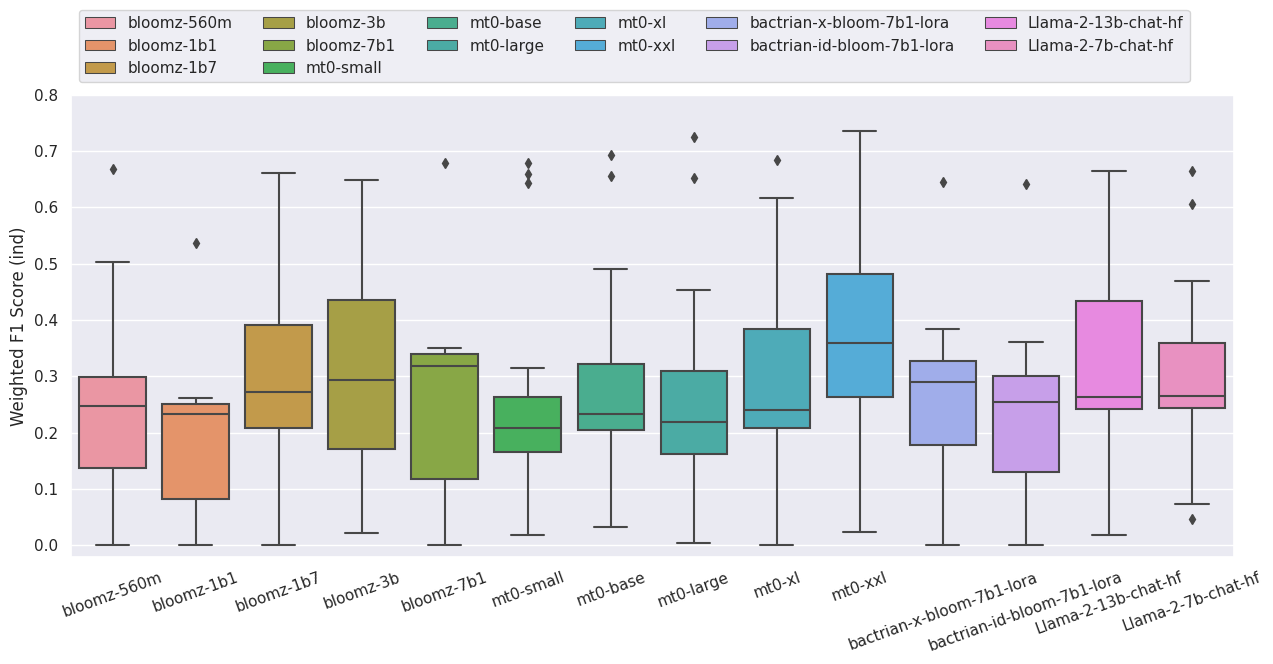

In [48]:
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylim(-0.02,0.8)
plt.ylabel('Weighted F1 Score (ind)')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

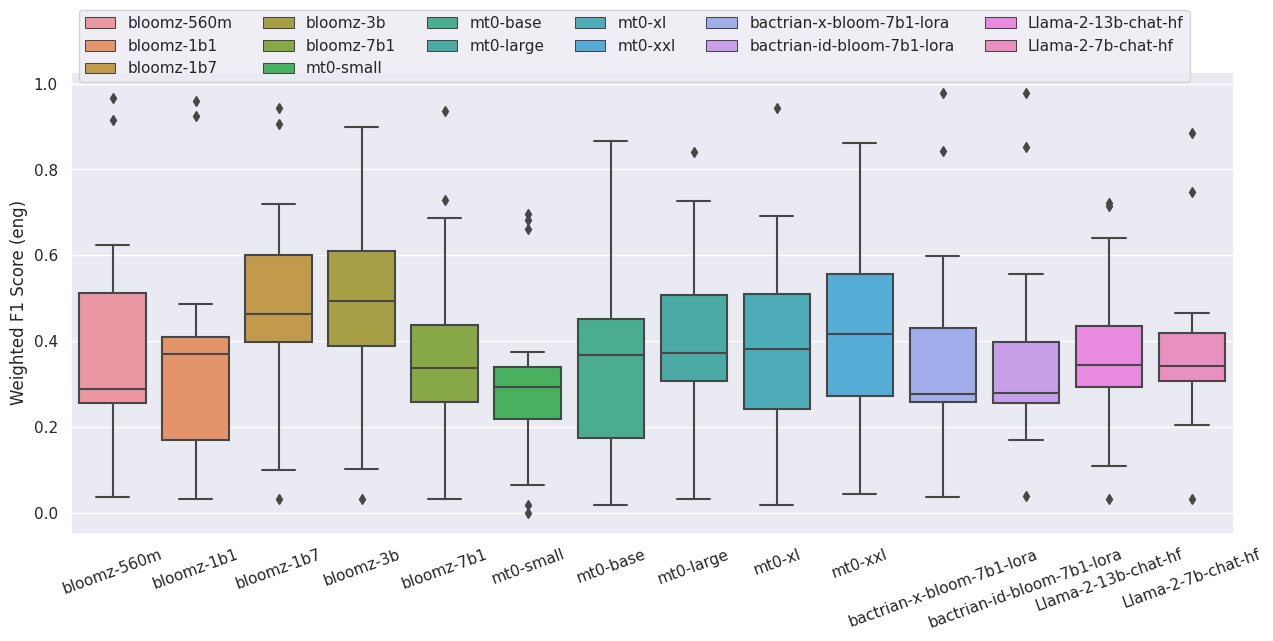

In [49]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score (eng)')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_eng.pdf', bbox_inches='tight')
plt.show()

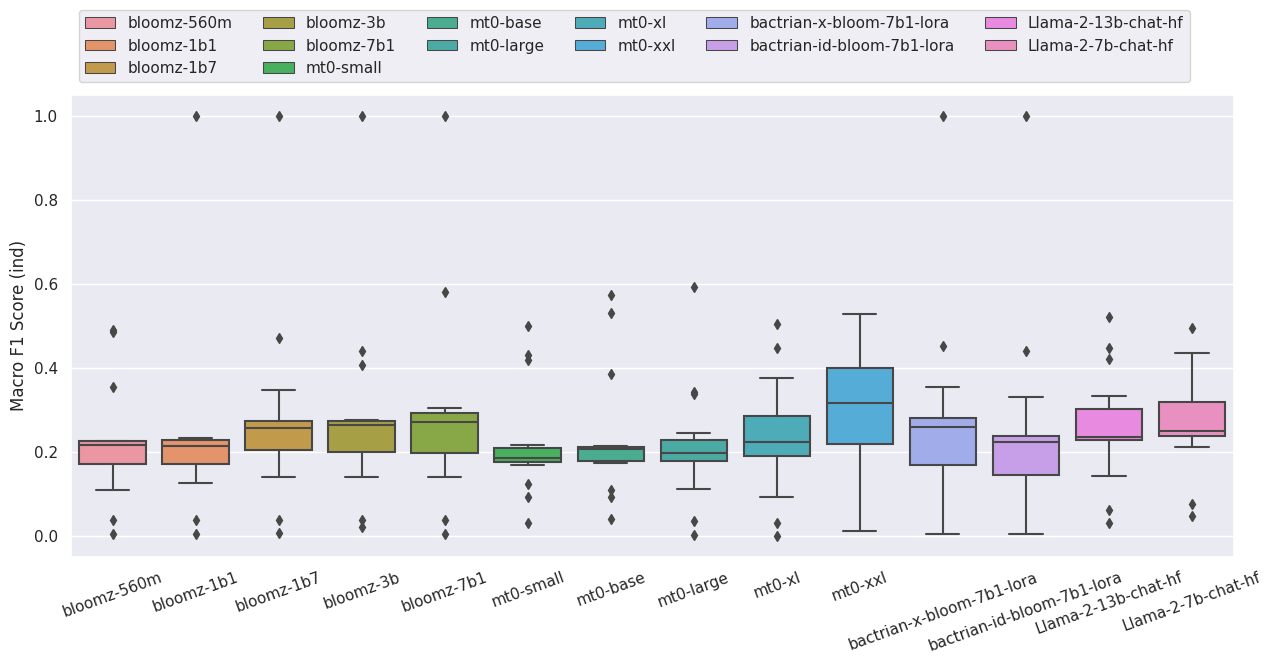

In [50]:
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Macro F1 Score (ind)')
plt.xlabel(None)
plt.savefig('./figures/macro_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

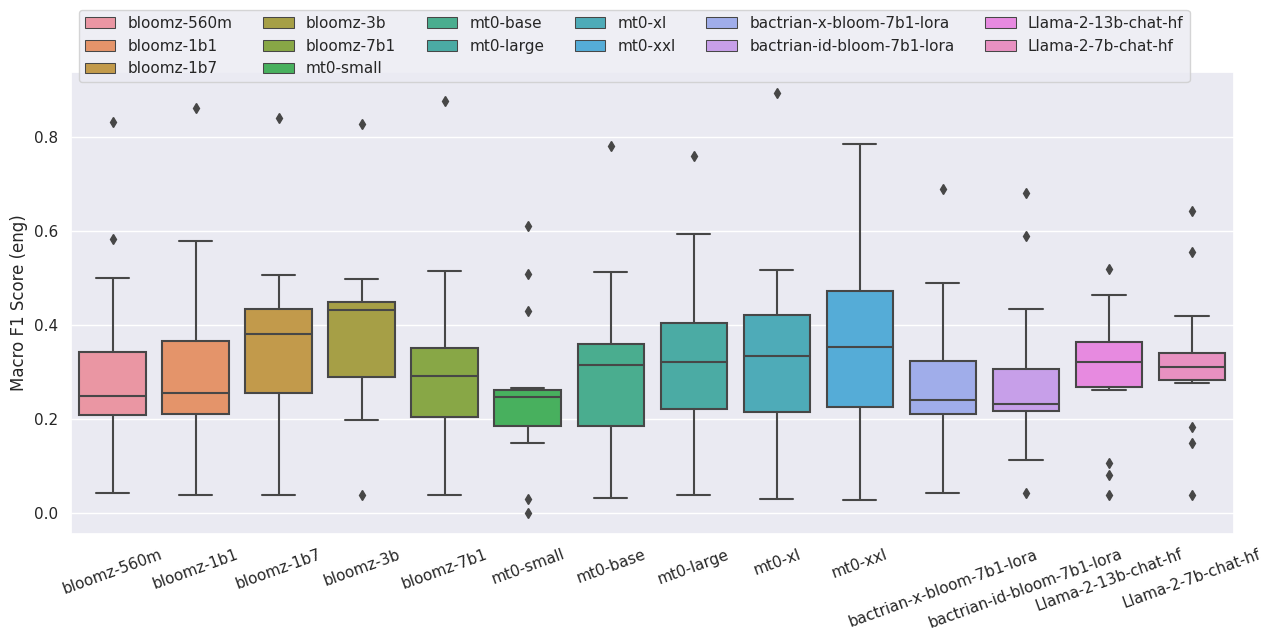

In [51]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='macro_f1_score', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Macro F1 Score (eng)')
plt.xlabel(None)
plt.savefig('./figures/macro_f1_score_eng.pdf', bbox_inches='tight')
plt.show()

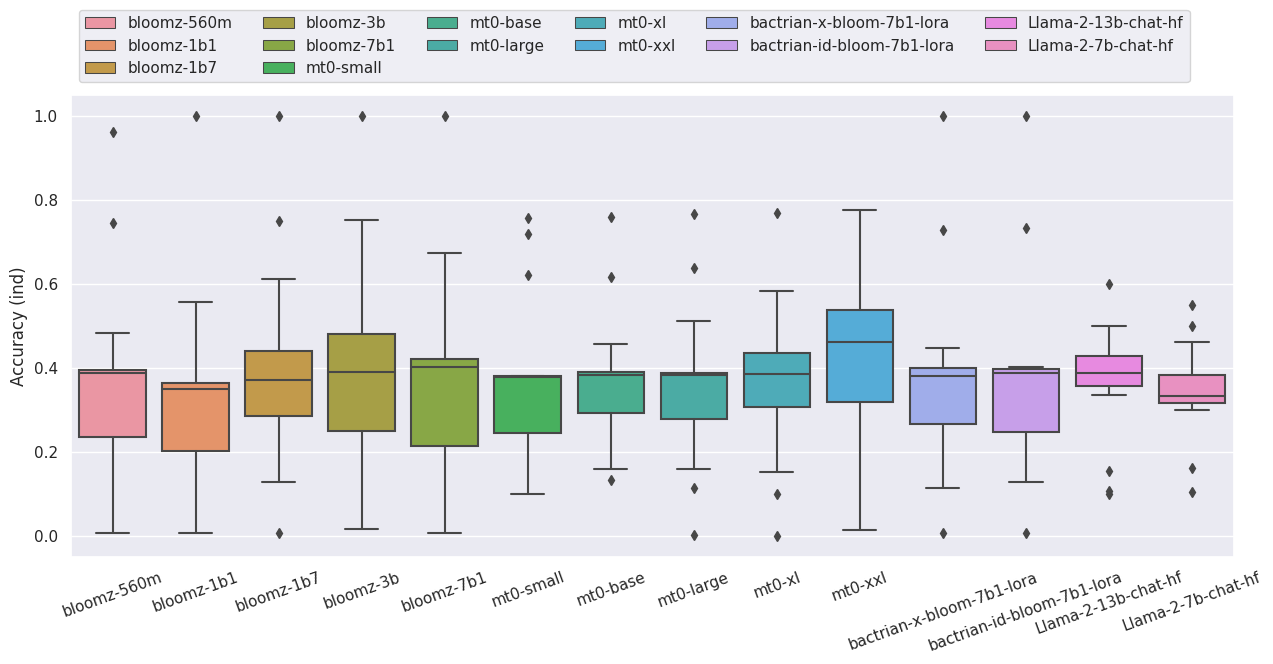

In [52]:
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='accuracy', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Accuracy (ind)')
plt.xlabel(None)
plt.savefig('./figures/accuracy_ind.pdf', bbox_inches='tight')
plt.show()

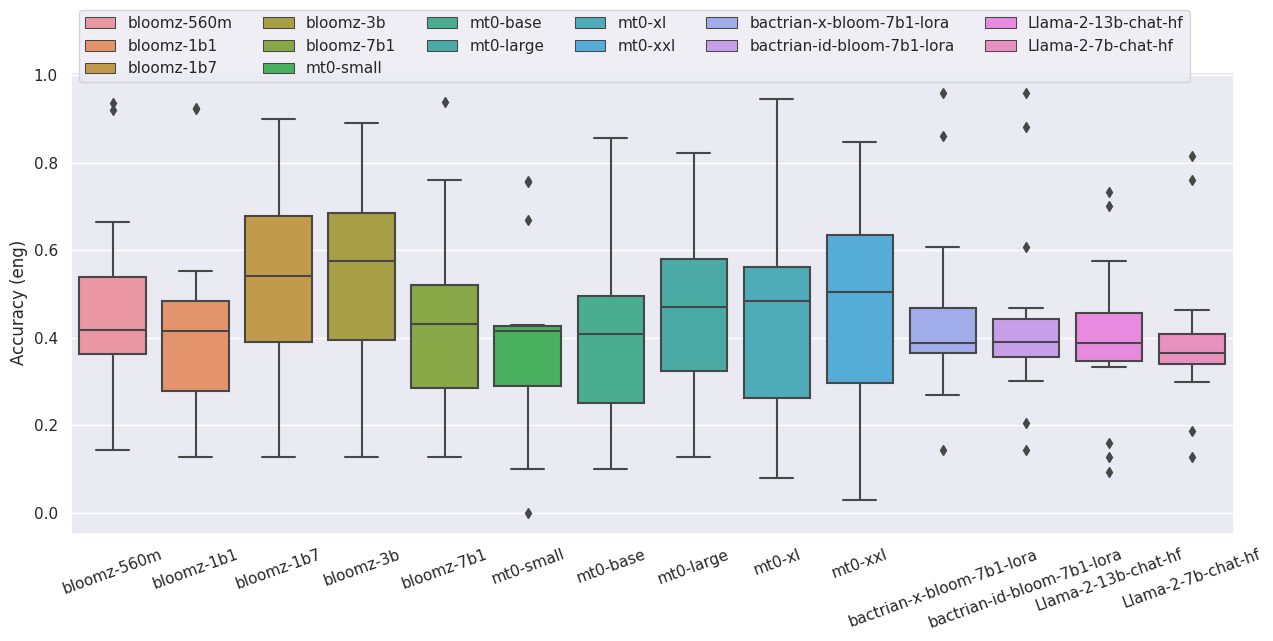

In [53]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='accuracy', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Accuracy (eng)')
plt.xlabel(None)
plt.savefig('./figures/accuracy_eng.pdf', bbox_inches='tight')
plt.show()

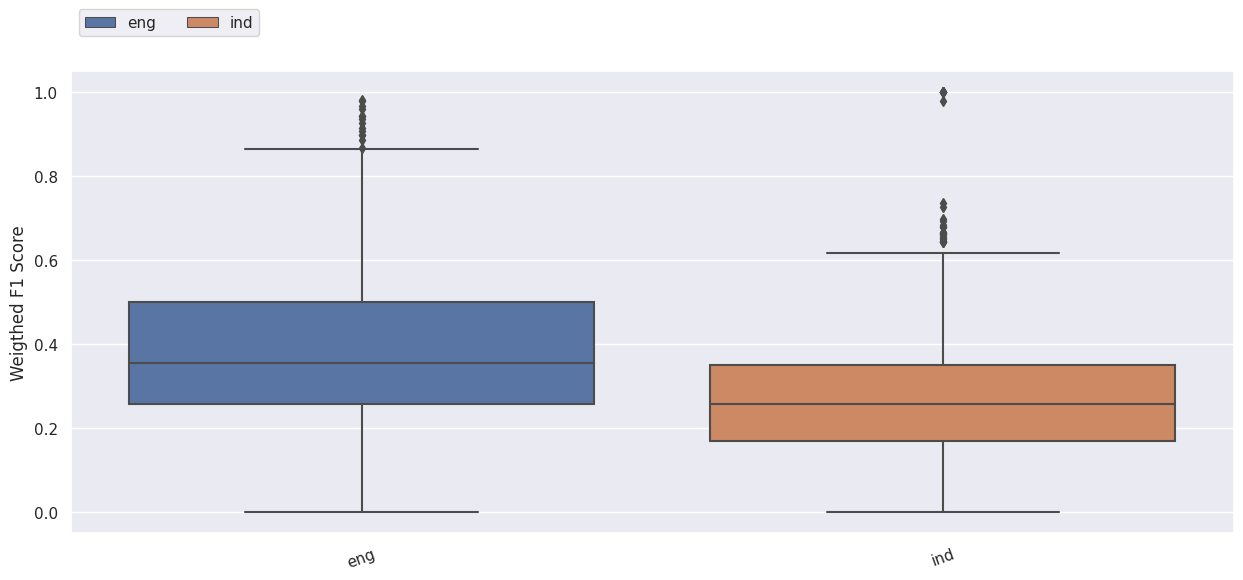

In [54]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf.sort_values('model_id'), x='lang', y='weighted_f1_score', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weigthed F1 Score')
plt.xlabel(None)
plt.savefig('./figures/weighted_f1_score_lang.pdf', bbox_inches='tight')
plt.show()

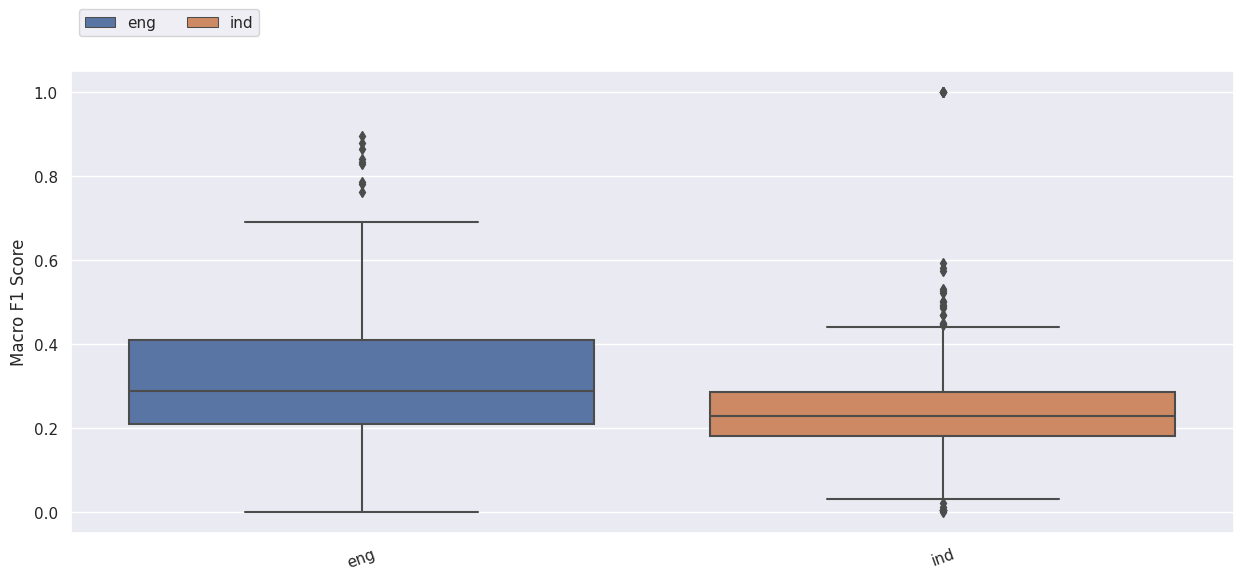

In [55]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf.sort_values('model_id'), x='lang', y='macro_f1_score', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Macro F1 Score')
plt.xlabel(None)
plt.savefig('./figures/macro_f1_score_lang.pdf', bbox_inches='tight')
plt.show()

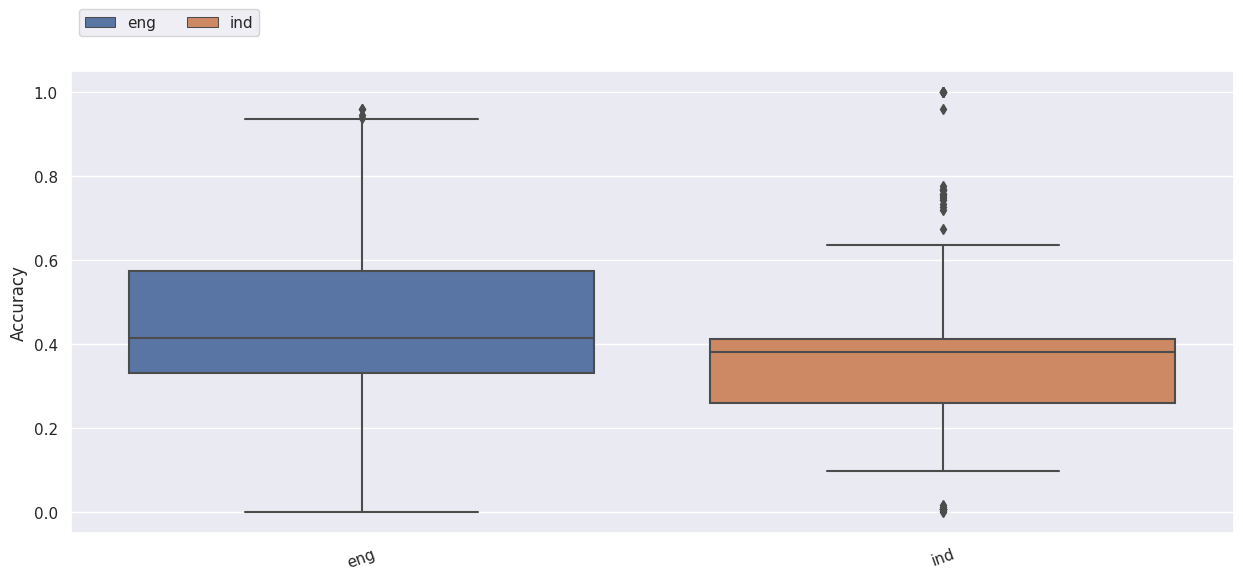

In [56]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf.sort_values('model_id'), x='lang', y='accuracy', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Accuracy')
plt.xlabel(None)
plt.savefig('./figures/accuracy_lang.pdf', bbox_inches='tight')
plt.show()

# Cendol Results

In [121]:
metric = 'macro_f1_score'

### All

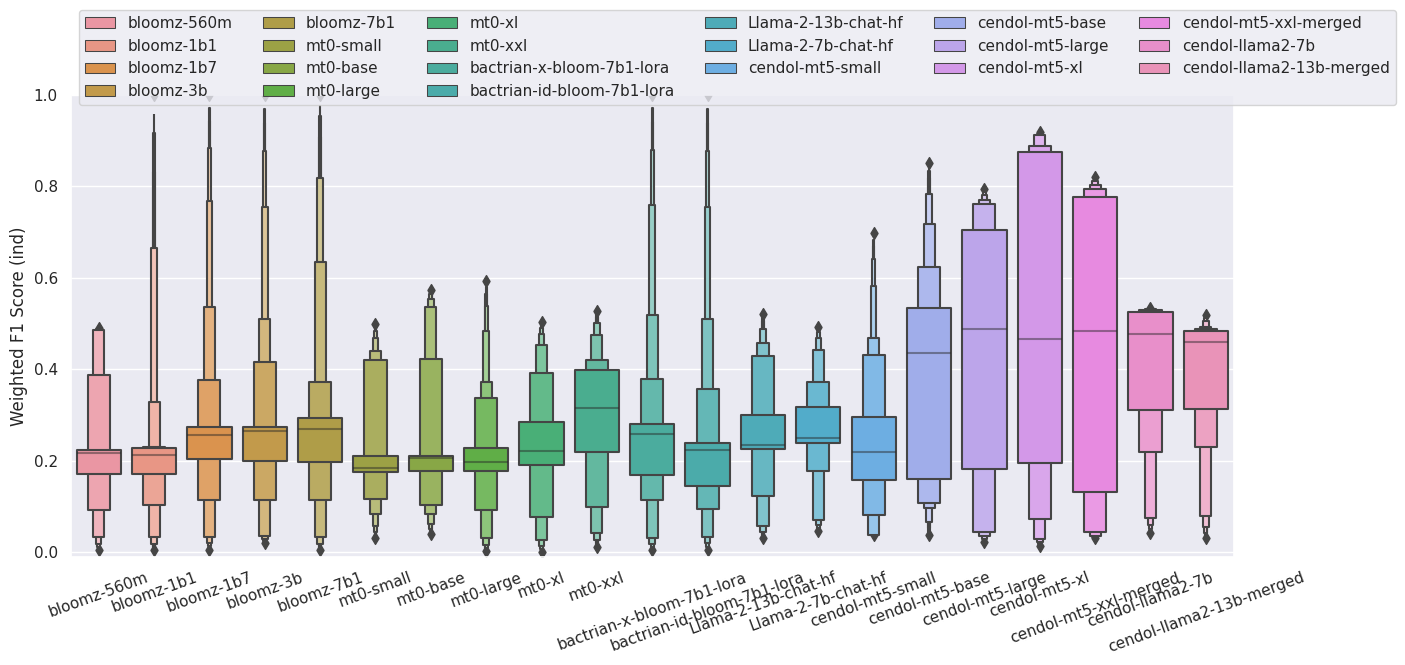

In [122]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
# pdf = pdf.loc[~pdf['model'].str.contains('bloom'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylim(-0.01,1.0)
plt.ylabel('Weighted F1 Score (ind)')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

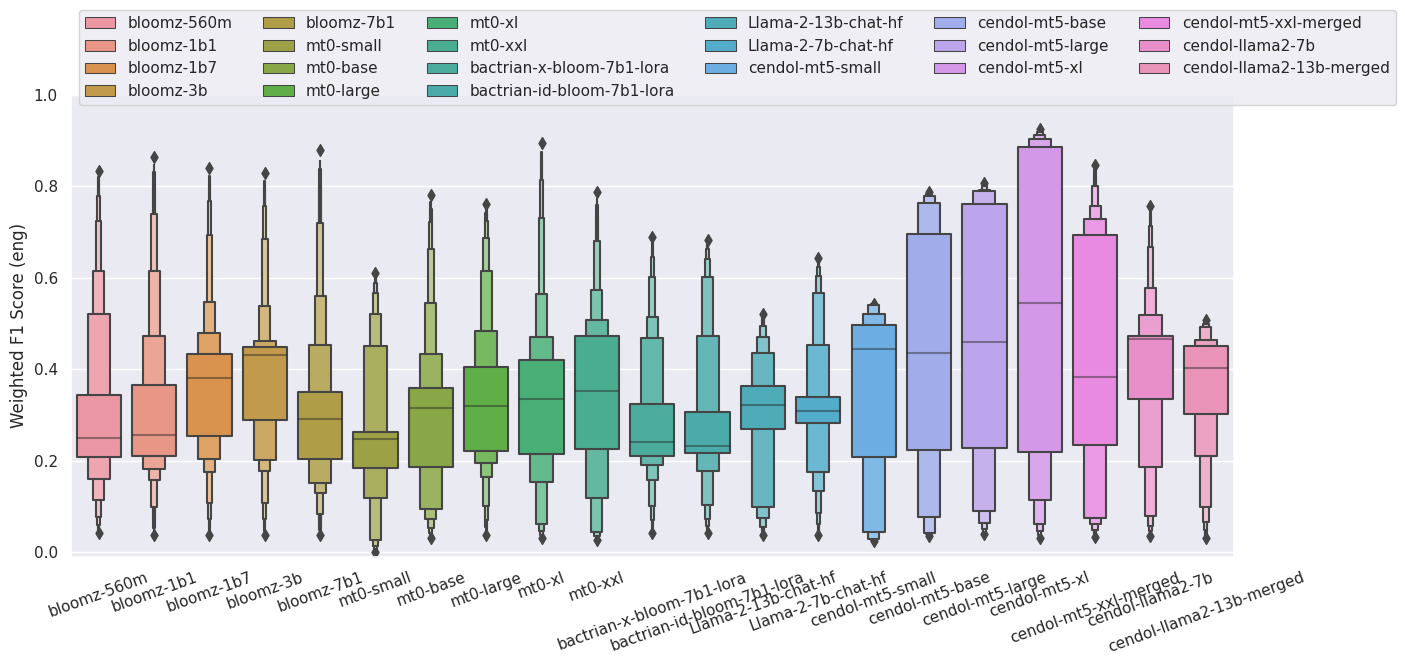

In [123]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
# pdf = pdf.loc[~pdf['model'].str.contains('bloom'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylim(-0.01,1.0)
plt.ylabel('Weighted F1 Score (eng)')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

### No BLOOM & Bactrian

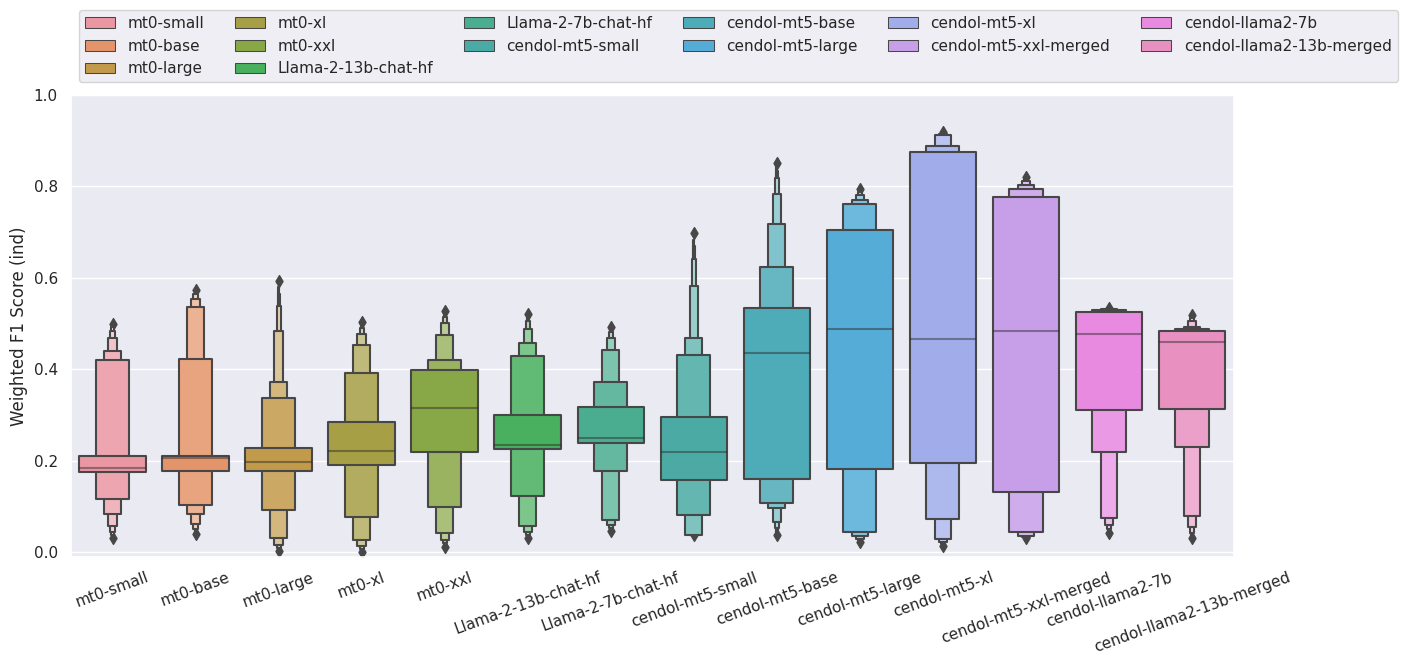

In [124]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('bloom'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylim(-0.01,1.0)
plt.ylabel('Weighted F1 Score (ind)')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

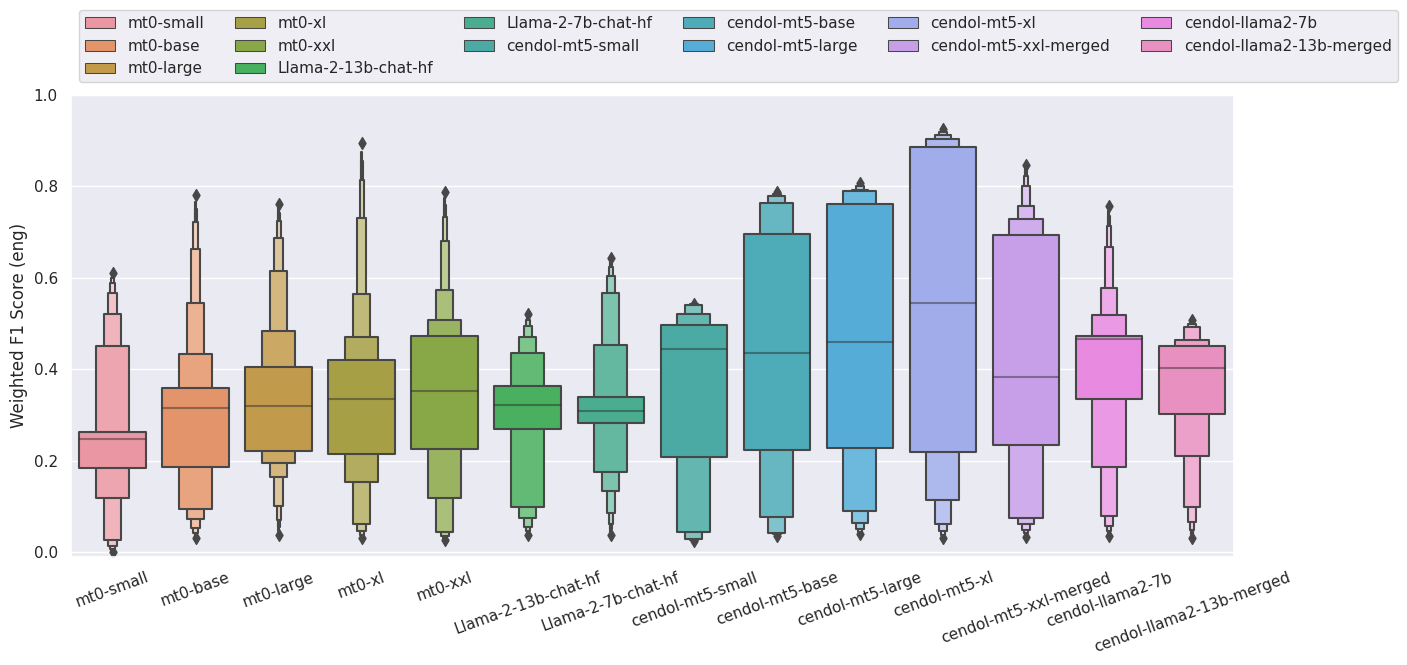

In [125]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('bloom'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylim(-0.01,1.0)
plt.ylabel('Weighted F1 Score (eng)')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

### mT5 Based

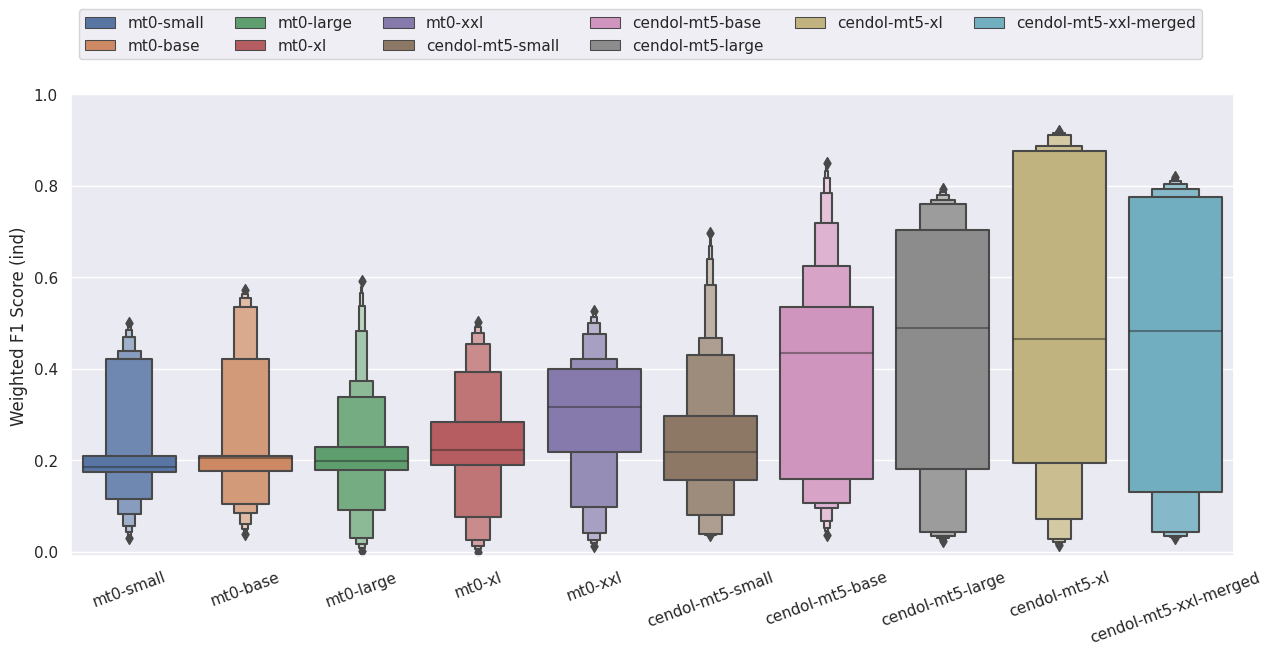

In [126]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[pdf['model'].str.contains('mt'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylim(-0.01,1.0)
plt.ylabel('Weighted F1 Score (ind)')
plt.xlabel(None)
# plt.savefig('./figures/weighted_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

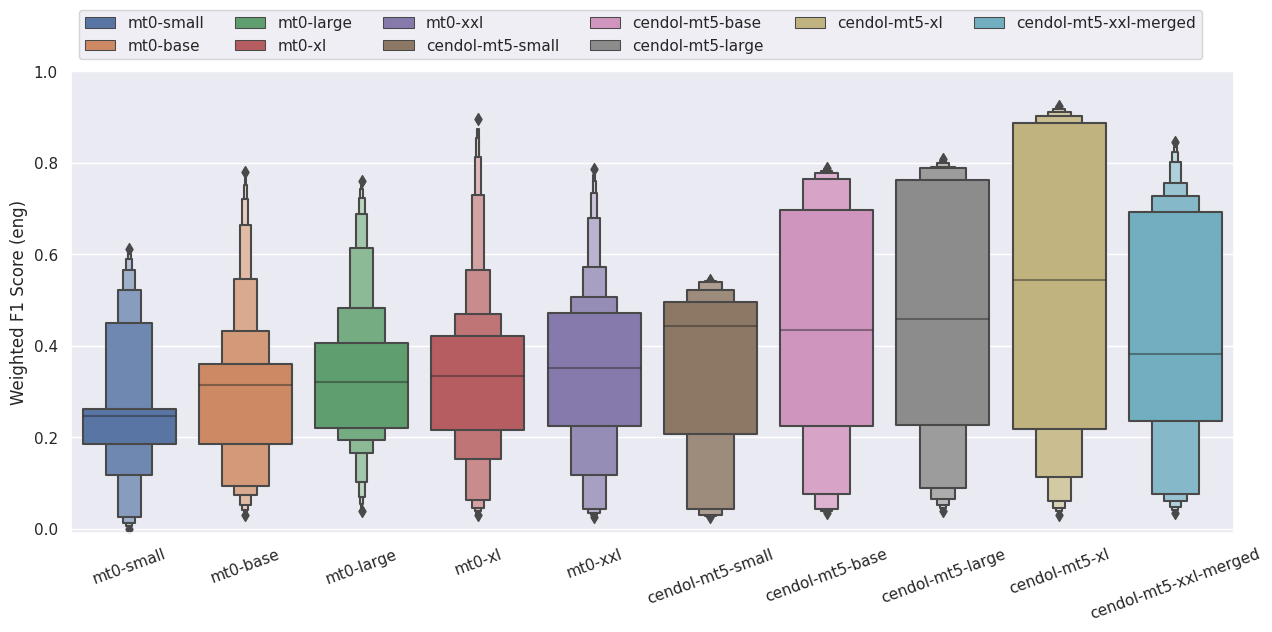

In [127]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[pdf['model'].str.contains('mt'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score (eng)')
plt.xlabel(None)
plt.ylim(-0.01,1.0)
# plt.savefig('./figures/weighted_f1_score_eng.pdf', bbox_inches='tight')
plt.show()

### LLaMA Based

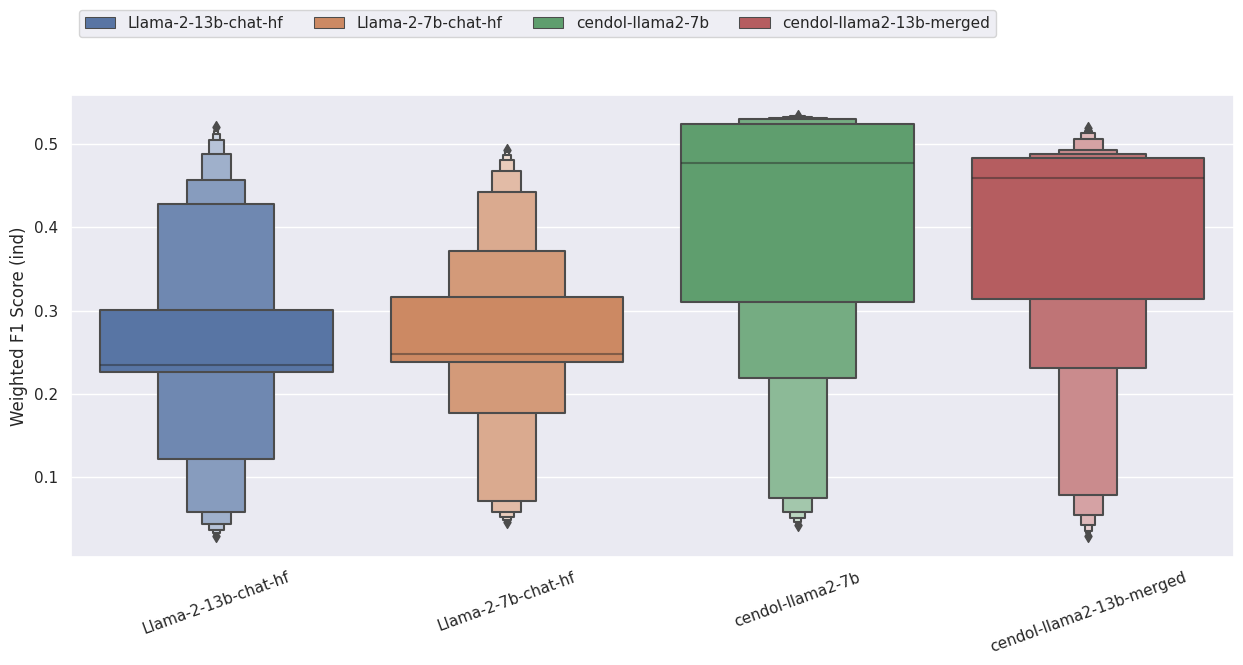

In [134]:
sns.set(rc={'figure.figsize':(15,6)})


pdf = df.groupby(['dataset', 'model', 'lang'])[[ 'accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[pdf['model'].str.contains('lama'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score (ind)')
plt.xlabel(None)
# plt.savefig('./figures/macro_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

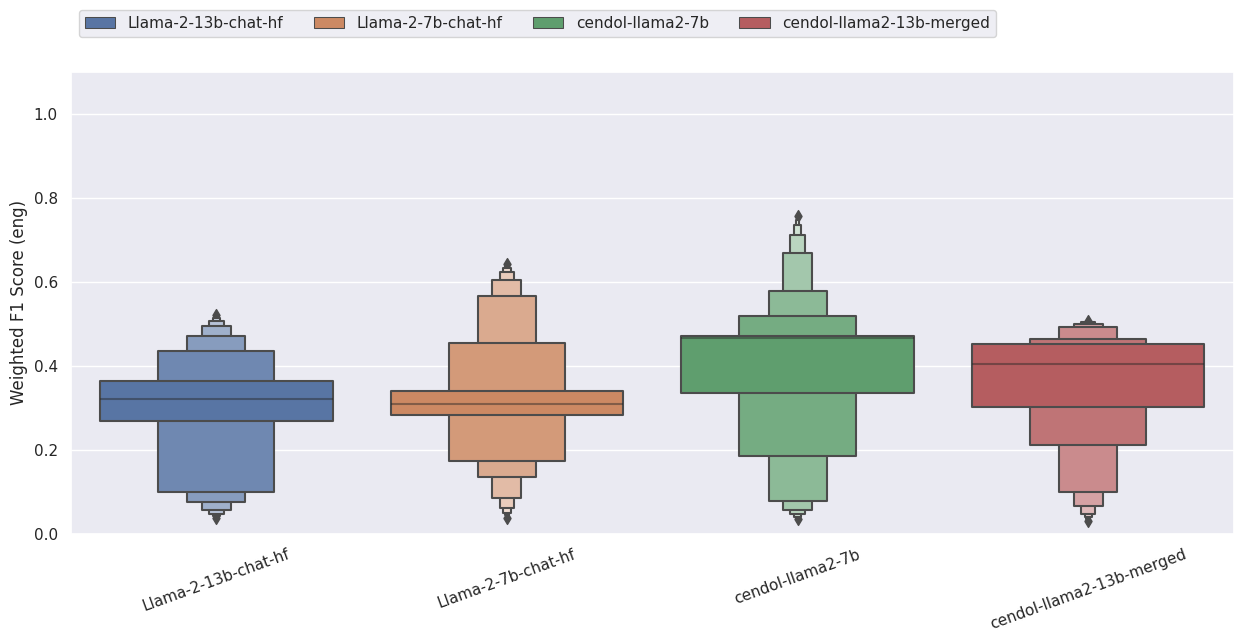

In [135]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[['accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[pdf['model'].str.contains('lama'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxenplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score (eng)')
plt.xlabel(None)

plt.ylim(0.0,1.1)
# plt.savefig('./figures/macro_f1_score_eng.pdf', bbox_inches='tight')
plt.show()

### Show Eng & Ind

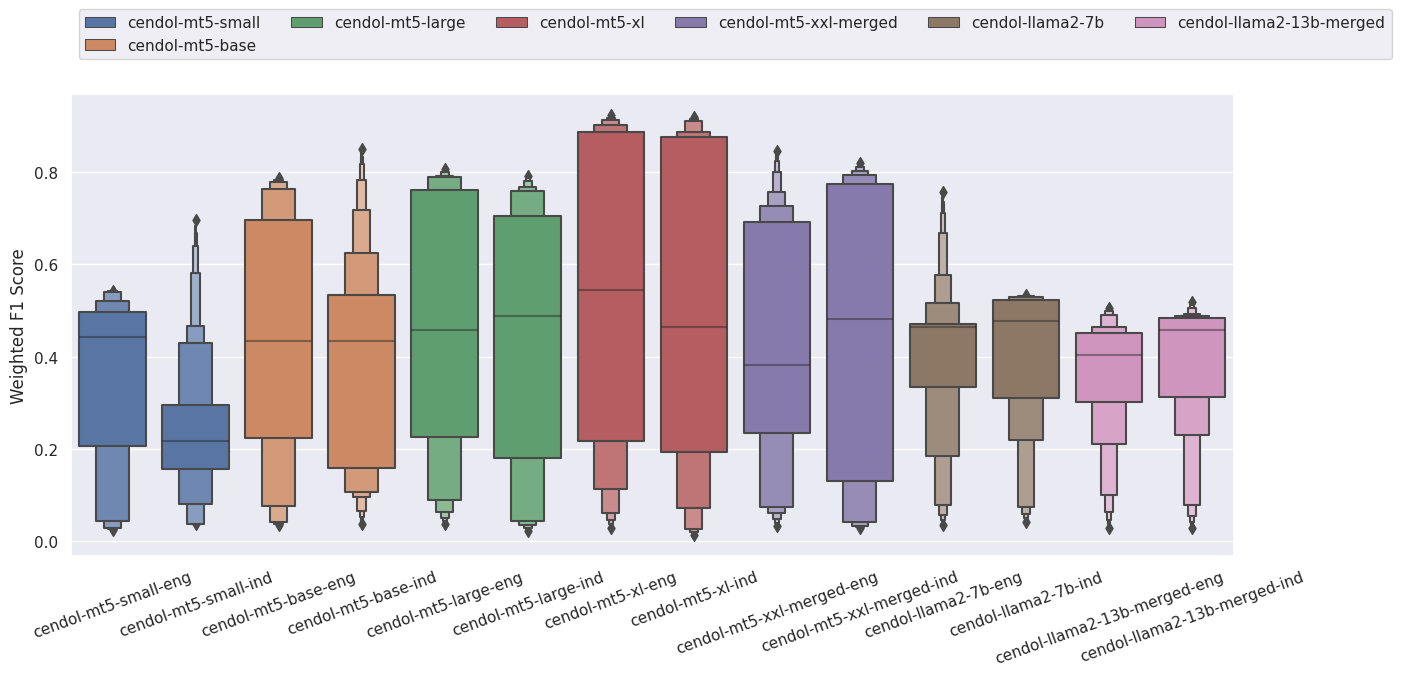

In [153]:
# Cendol Only
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[[ 'accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['lang_model'] = pdf.apply(lambda x: x['model'] + '-' + x['lang'], axis='columns')
sns.boxenplot(pdf.sort_values(['model_id','lang']), x='lang_model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score')
plt.xlabel(None)
# plt.savefig('./figures/macro_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

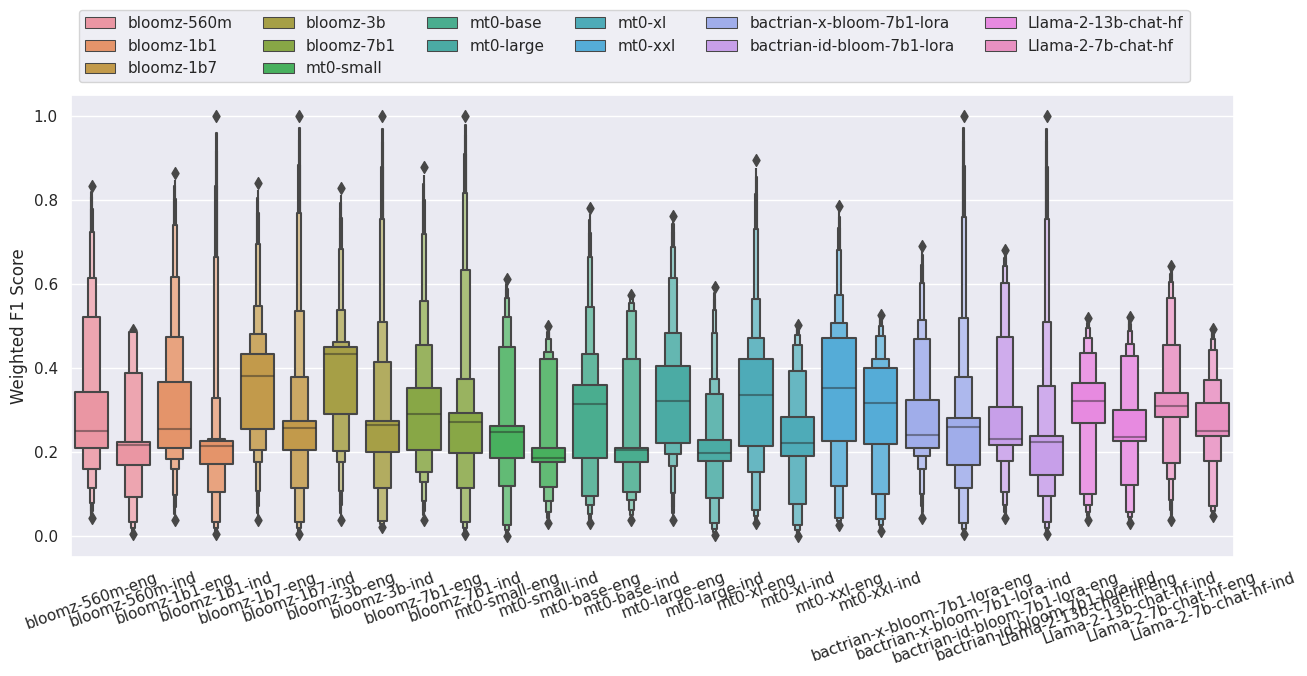

In [154]:
# Non Cendol
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[[ 'accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[~pdf['model'].str.contains('cendol'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['lang_model'] = pdf.apply(lambda x: x['model'] + '-' + x['lang'], axis='columns')
sns.boxenplot(pdf.sort_values(['model_id','lang']), x='lang_model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score')
plt.xlabel(None)
# plt.savefig('./figures/macro_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

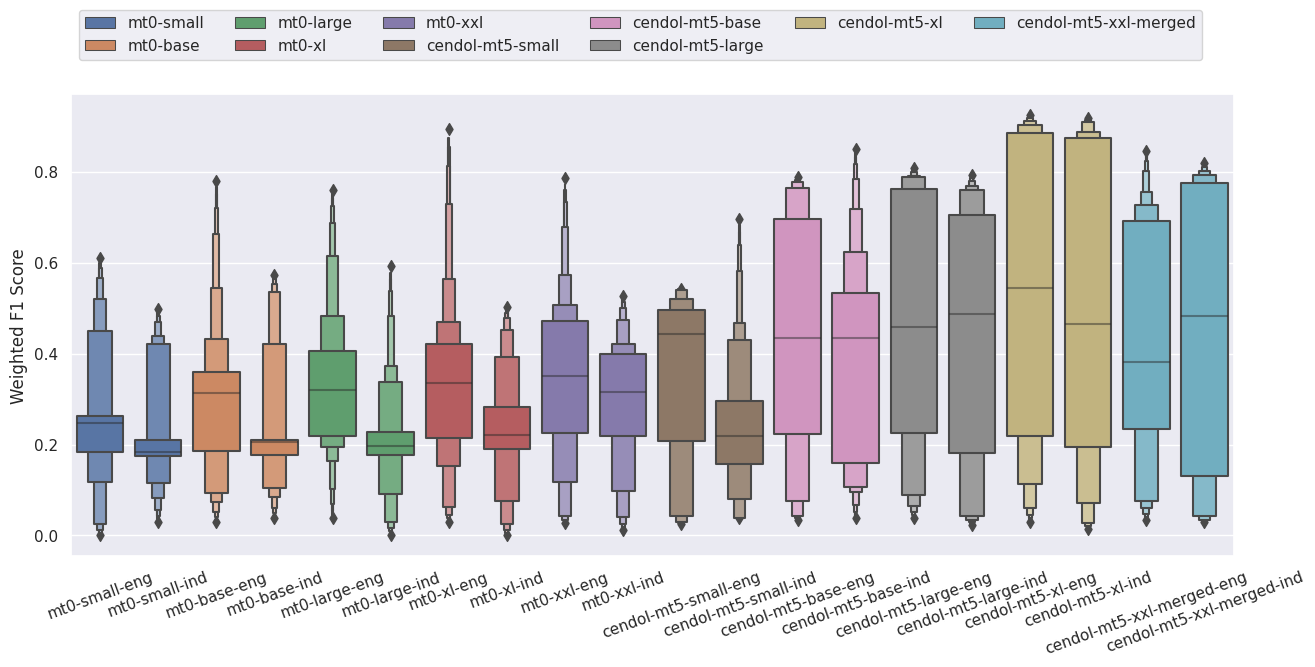

In [155]:
# mT5
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[[ 'accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[pdf['model'].str.contains('mt'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['lang_model'] = pdf.apply(lambda x: x['model'] + '-' + x['lang'], axis='columns')
sns.boxenplot(pdf.sort_values(['model_id', 'lang']), x='lang_model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score')
plt.xlabel(None)
# plt.savefig('./figures/macro_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

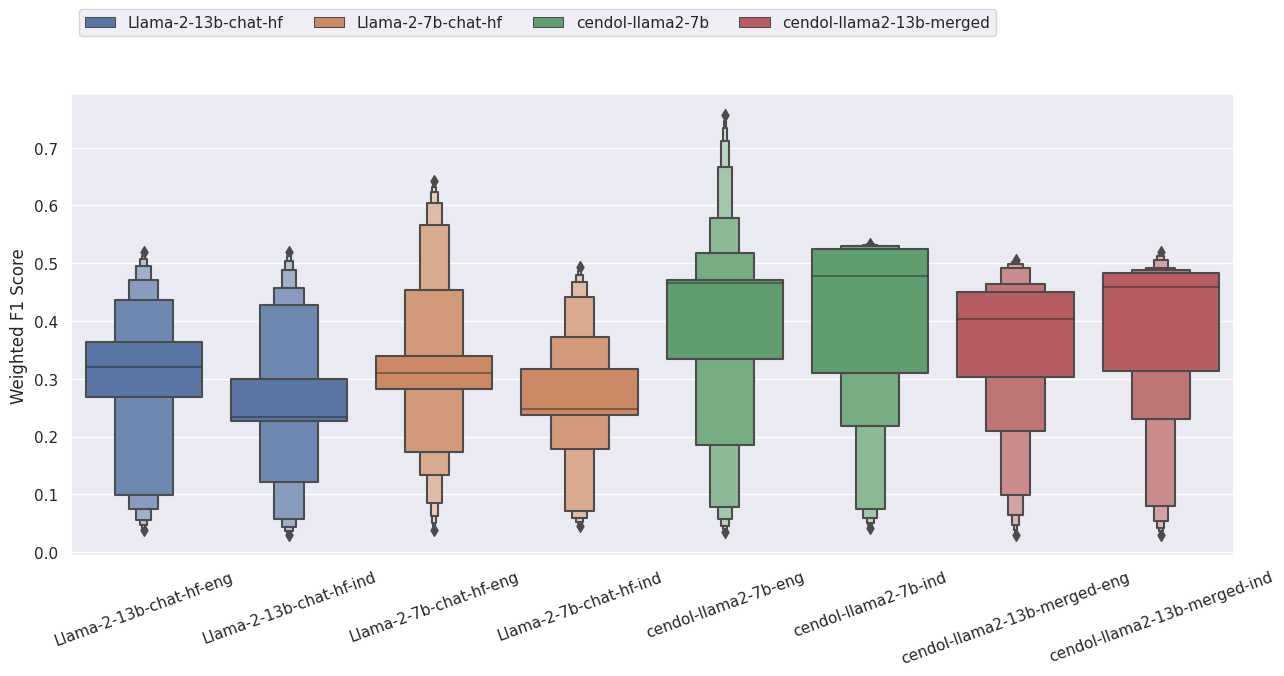

In [156]:
# LLaMA
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.groupby(['dataset', 'model', 'lang'])[[ 'accuracy','macro_f1_score','weighted_f1_score']].mean().reset_index()
pdf = pdf.loc[pdf['model'].str.contains('lama'),:]
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
pdf['lang_model'] = pdf.apply(lambda x: x['model'] + '-' + x['lang'], axis='columns')
sns.boxenplot(pdf.sort_values(['model_id', 'lang']), x='lang_model', y=metric, hue='model', k_depth=7, dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('Weighted F1 Score')
plt.xlabel(None)
# plt.savefig('./figures/macro_f1_score_ind.pdf', bbox_inches='tight')
plt.show()

## Insights
- Effect of Instruction-Tuned on Indonesian
  - Significantly increase the performance on target languages (Full: ~10-20%, LoRA: ~5%)
  - Reduce the gap between HRL (English) & target language instruction => Generalization of prompt language?
- LoRA
  - Performance: LoRA on largest model not as good as full fine-tuning w/ smaller models. i.e., mt5-large & mt5-xl is better than mt5-xxl-lora
  - Efficiency: While the performance of mt5-large is only as slightly higher as mt5-xxl-lora, the throughput is 3x higher

# Save

In [ ]:
df.to_csv('raw_result_nlu.csv', index=False)

In [105]:
df.groupby(['model', 'lang']).size().sort_values().reset_index()

model lang   0
0   bactrian-id-bloom-7b1-lora  eng  75
1                       mt0-xl  ind  75
2                       mt0-xl  eng  75
3                    mt0-small  ind  75
4                    mt0-small  eng  75
5                    mt0-large  ind  75
6                    mt0-large  eng  75
7                     mt0-base  ind  75
8                     mt0-base  eng  75
9                   bloomz-7b1  ind  75
10                  bloomz-7b1  eng  75
11                 bloomz-560m  ind  75
12                 bloomz-560m  eng  75
13                   bloomz-3b  ind  75
14                   bloomz-3b  eng  75
15                  bloomz-1b7  ind  75
16                  bloomz-1b7  eng  75
17                  bloomz-1b1  ind  75
18                  bloomz-1b1  eng  75
19   bactrian-x-bloom-7b1-lora  ind  75
20   bactrian-x-bloom-7b1-lora  eng  75
21  bactrian-id-bloom-7b1-lora  ind  75
22                     mt0-xxl  eng  75
23                     mt0-xxl  ind  75

# NLG

In [87]:
dfs = []
for path in glob.glob('metrics_nlg/*.csv'):
    model = path[:-4].split('_')[-1]
    lang = path.split('results')[1].split('_')[1]
    df = pd.read_csv(path).set_index('index')
    df['BLEU'] = df['BLEU'].astype(float)
    df['SacreBLEU'] = df['SacreBLEU'].astype(float)
    df['chrF++'] = df['chrF++'].astype(float)
    df['ROUGE1'] = df['ROUGE1'].astype(float)
    df['ROUGE2'] = df['ROUGE2'].astype(float)
    df['ROUGEL'] = df['ROUGEL'].astype(float)
    df['ROUGELsum'] = df['ROUGELsum'].astype(float)
    df['model'] = model
    df['lang'] = lang
    dfs.append(df)
df = pd.concat(dfs)
df = df[df['dataset'] != 'xpersona_id_nusantara_t2t']

In [92]:
df[df['model'].str.contains('cendol')].to_csv('combine_nlg.csv')

In [88]:
df[(df['lang'] == 'ind')].groupby(['model','lang'])[['SacreBLEU','ROUGE1', 'ROUGE2', 'ROUGEL','chrF++']].mean().sort_values(['model','SacreBLEU'])

SacreBLEU     ROUGE1     ROUGE2     ROUGEL  \
model                      lang                                               
Llama-2-13b-chat-hf        ind    3.324545  16.883140   7.128071  15.832894   
Llama-2-7b-chat-hf         ind    2.791775  14.835144   6.320598  14.052079   
bactrian-id-bloom-7b1-lora ind    2.356005  14.415424   5.168288  13.304684   
bactrian-x-bloom-7b1-lora  ind    0.960321   8.620803   2.638724   7.882055   
bloomz-1b1                 ind    4.586023  14.857253   5.328231  13.995502   
bloomz-1b7                 ind    5.038512  12.862458   5.273250  12.296630   
bloomz-3b                  ind    6.294449  17.135872   6.958121  16.311493   
bloomz-560m                ind    4.602943  12.718576   4.930297  12.191570   
bloomz-7b1                 ind    6.426036  17.807500   7.089275  16.870734   
cendol-mt5-base            ind   37.069155  53.502414  38.567860  52.856692   
cendol-mt5-large           ind   48.388600  62.584833  50.220225  62.021531   
cendol-mt5-small           ind   22.959668  40.332383  24.509155  39.857751   
cendol-mt5-xl              ind   66.750860  76.256614  69.028810  75.747888   
mt0-base                   ind    6.189531  18.996834   7.314583  18.203735   
mt0-large                  ind    6.482540  18.694403   7.272266  17.830084   
mt0-small                  ind    4.181972  14.308188   5.205761  13.727441   
mt0-xl                     ind    9.536579  24.015152  10.810049  23.092788   
mt0-xxl                    ind   10.071655  25.562730  11.578500  24.584798   

                                    chrF++  
model                      lang             
Llama-2-13b-chat-hf        ind   30.707215  
Llama-2-7b-chat-hf         ind   28.887546  
bactrian-id-bloom-7b1-lora ind   25.644049  
bactrian-x-bloom-7b1-lora  ind   20.781956  
bloomz-1b1                 ind   22.895404  
bloomz-1b7                 ind   20.642218  
bloomz-3b                  ind   24.386141  
bloomz-560m                ind   20.581047  
bloomz-7b1                 ind   25.140917  
cendol-mt5-base            ind   57.037179  
cendol-mt5-large           ind   65.013014  
cendol-mt5-small           ind   45.483812  
cendol-mt5-xl              ind   77.286911  
mt0-base                   ind   27.417438  
mt0-large                  ind   26.504095  
mt0-small                  ind   23.542255  
mt0-xl                     ind   31.511595  
mt0-xxl                    ind   32.200562

In [159]:
df[(df['lang'] == 'eng')].groupby(['model','lang'])[['SacreBLEU','ROUGE1', 'ROUGE2', 'ROUGEL','chrF++']].mean().sort_values(['model','SacreBLEU'])

SacreBLEU     ROUGE1     ROUGE2     ROUGEL  \
model                      lang                                               
Llama-2-13b-chat-hf        eng    1.541560   8.322037   3.349922   8.032606   
Llama-2-7b-chat-hf         eng    1.705193   9.732551   3.972771   9.495909   
bactrian-id-bloom-7b1-lora eng    1.791643  10.437900   3.755011   9.810853   
bactrian-x-bloom-7b1-lora  eng    0.802432   6.108574   1.970028   5.678123   
bloomz-1b1                 eng    4.613291  15.128338   5.532564  14.241692   
bloomz-1b7                 eng    7.215499  18.481758   7.836022  17.763020   
bloomz-3b                  eng    7.097794  18.139578   7.597966  17.337944   
bloomz-560m                eng    5.826057  16.273169   6.329108  15.467486   
bloomz-7b1                 eng    6.857621  18.163227   7.516305  17.280908   
cendol-mt5-base            eng   25.118358  39.678465  27.136150  39.168396   
cendol-mt5-large           eng   34.224326  49.508675  36.297104  49.029069   
cendol-mt5-small           eng   18.001316  34.941572  20.353765  34.411079   
cendol-mt5-xl              eng   45.792260  56.886069  46.792628  56.442104   
mt0-base                   eng    5.580968  16.822153   6.402197  16.105770   
mt0-large                  eng    6.273054  18.081343   6.881299  17.240536   
mt0-small                  eng    4.661567  15.603519   5.702646  15.058351   
mt0-xl                     eng    8.387531  21.327283   9.136951  20.373220   
mt0-xxl                    eng    9.769102  23.875317  11.027389  22.950907   

                                    chrF++  
model                      lang             
Llama-2-13b-chat-hf        eng   22.994543  
Llama-2-7b-chat-hf         eng   23.694124  
bactrian-id-bloom-7b1-lora eng   21.709697  
bactrian-x-bloom-7b1-lora  eng   18.639820  
bloomz-1b1                 eng   22.818990  
bloomz-1b7                 eng   27.003102  
bloomz-3b                  eng   25.904428  
bloomz-560m                eng   25.102588  
bloomz-7b1                 eng   26.062732  
cendol-mt5-base            eng   48.394912  
cendol-mt5-large           eng   56.477753  
cendol-mt5-small           eng   44.074295  
cendol-mt5-xl              eng   63.090314  
mt0-base                   eng   25.170302  
mt0-large                  eng   25.853442  
mt0-small                  eng   24.320892  
mt0-xl                     eng   29.559824  
mt0-xxl                    eng   30.909586

# STIF

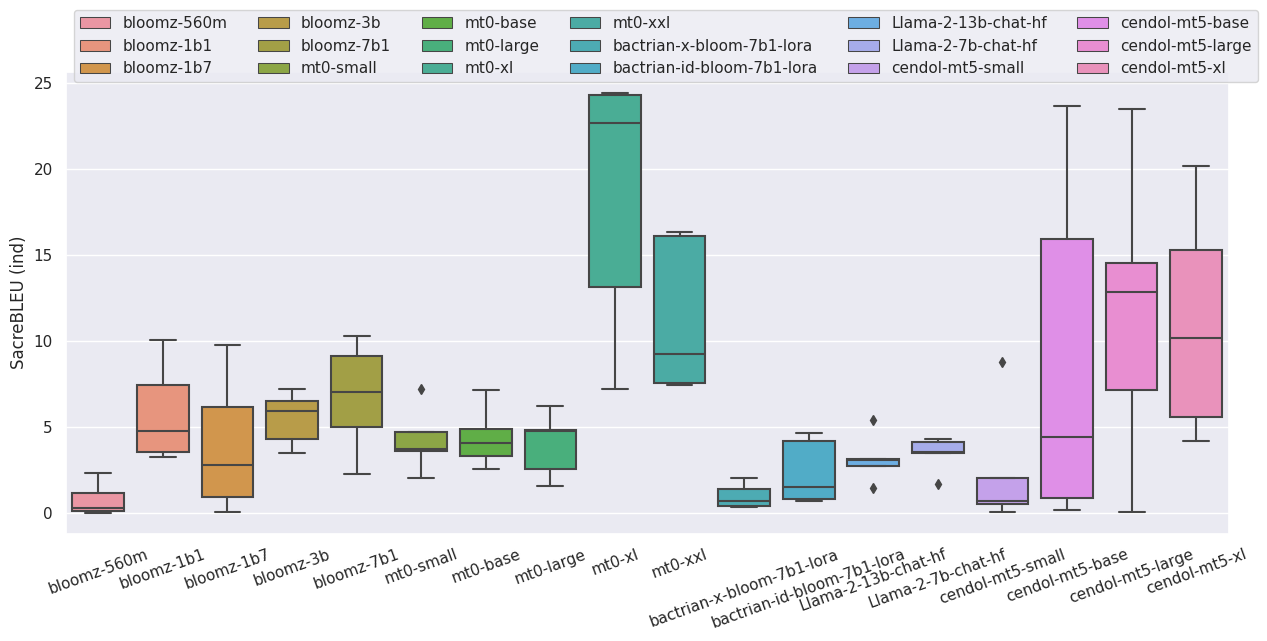

In [160]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'] == 'stif_indonesia_nusantara_t2t') & (pdf['lang'] == 'ind')
].sort_values('model_id'), x='model', y='SacreBLEU', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU (ind)')
plt.xlabel(None)
plt.savefig('./figures/bleu_stif_ind.pdf', bbox_inches='tight')
plt.show()

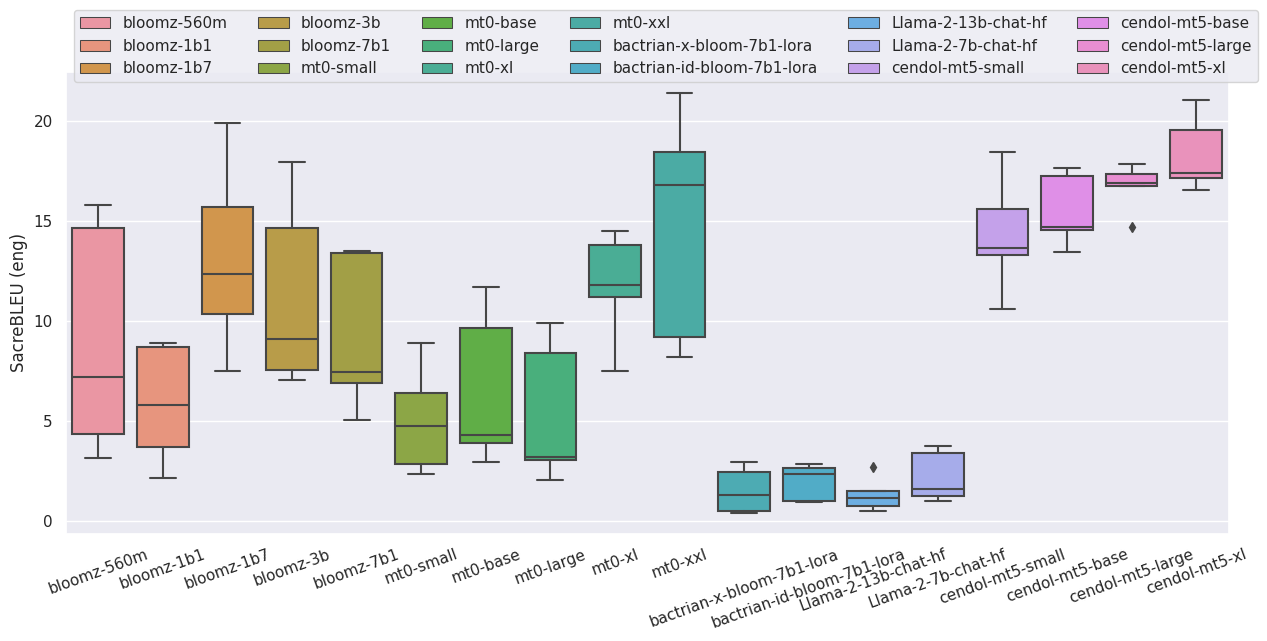

In [161]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'] == 'stif_indonesia_nusantara_t2t') & (pdf['lang'] == 'eng')
].sort_values('model_id'), x='model', y='SacreBLEU', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU (eng)')
plt.xlabel(None)
plt.savefig('./figures/bleu_stif_eng.pdf', bbox_inches='tight')
plt.show()

# MT Directional

### To Ind

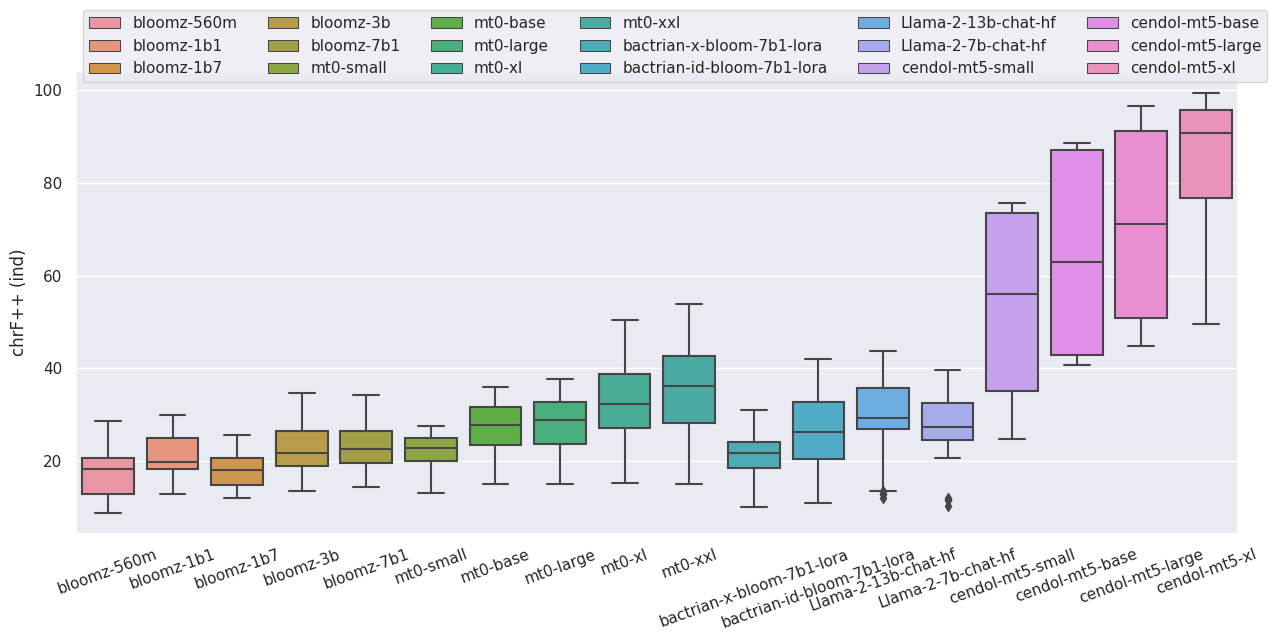

In [162]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'].str.endswith('ind_nusantara_t2t')) & (pdf['lang'] == 'ind')
].sort_values('model_id'), x='model', y='chrF++', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('chrF++ (ind)')
plt.xlabel(None)
plt.savefig('./figures/chrf_mt2ind_ind.pdf', bbox_inches='tight')
plt.show()

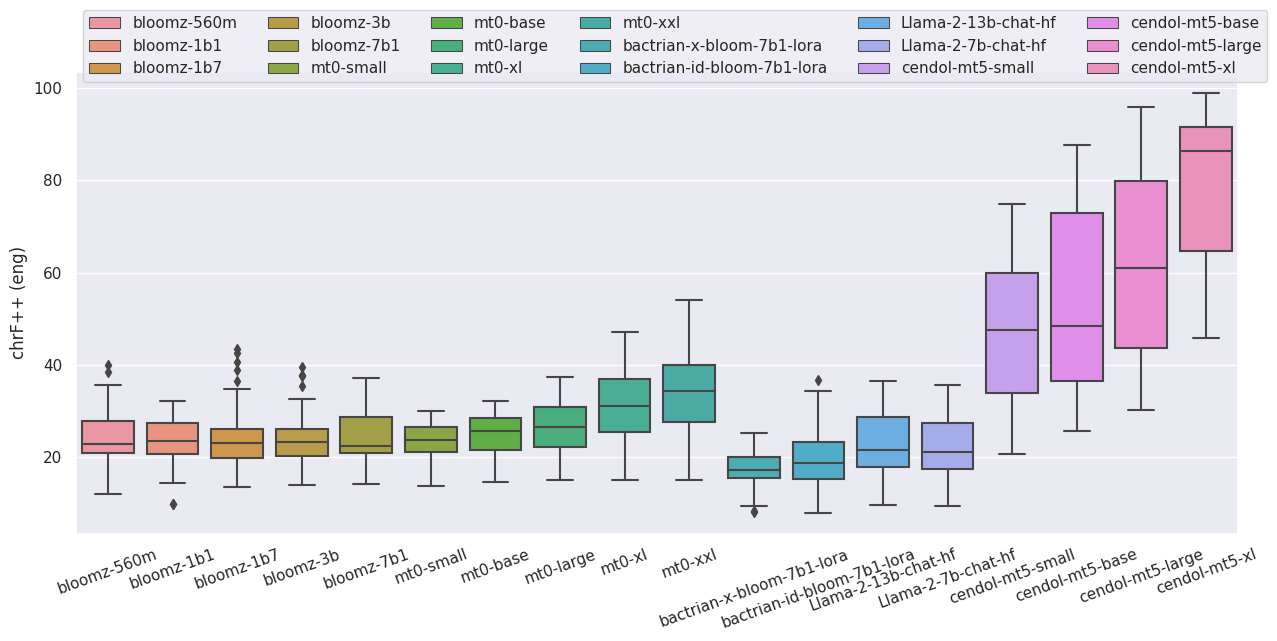

In [163]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'].str.endswith('ind_nusantara_t2t')) & (pdf['lang'] == 'eng')
].sort_values('model_id'), x='model', y='chrF++', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('chrF++ (eng)')
plt.xlabel(None)
plt.savefig('./figures/chrf_mt2ind_eng.pdf', bbox_inches='tight')
plt.show()

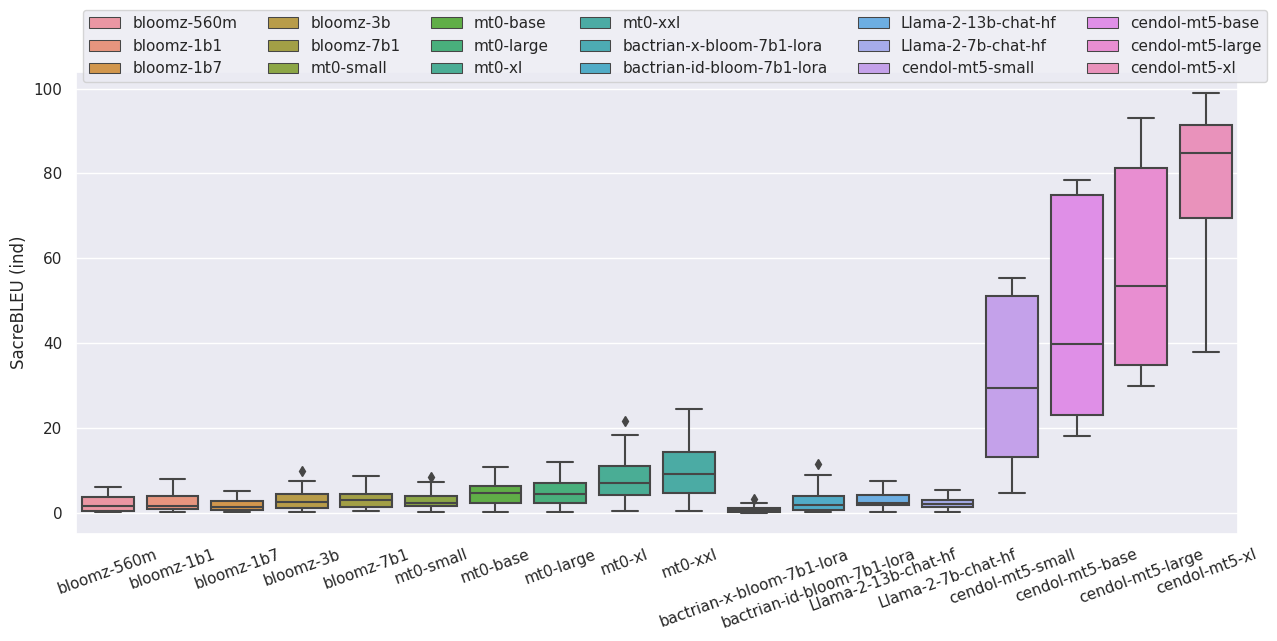

In [164]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'].str.endswith('ind_nusantara_t2t')) & (pdf['lang'] == 'ind')
].sort_values('model_id'), x='model', y='SacreBLEU', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU (ind)')
plt.xlabel(None)
plt.savefig('./figures/bleu_mt2ind_ind.pdf', bbox_inches='tight')
plt.show()

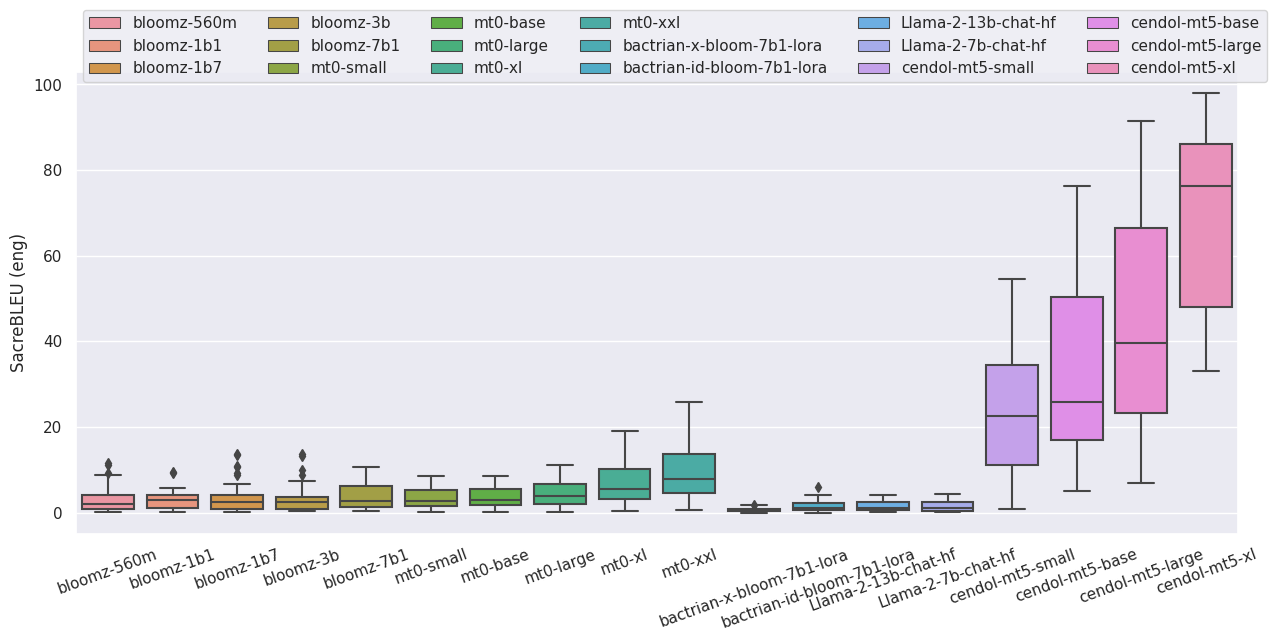

In [165]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'].str.endswith('ind_nusantara_t2t')) & (pdf['lang'] == 'eng')
].sort_values('model_id'), x='model', y='SacreBLEU', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU (eng)')
plt.xlabel(None)
plt.savefig('./figures/bleu_mt2ind_eng.pdf', bbox_inches='tight')
plt.show()

### From Ind

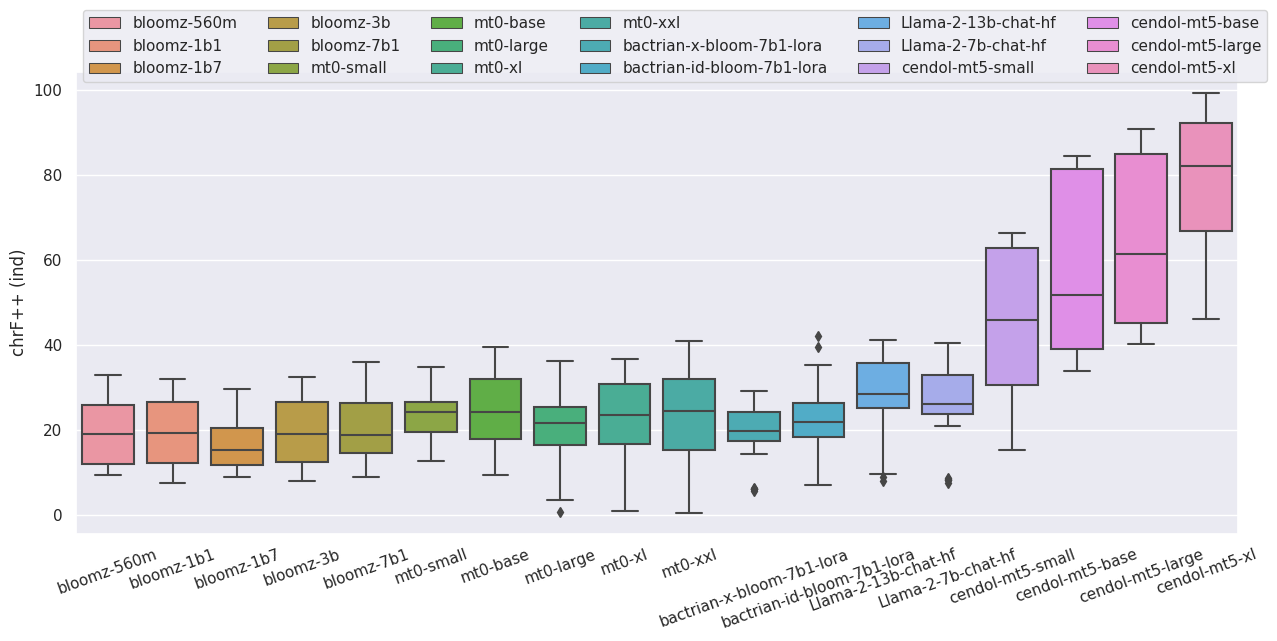

In [166]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'].str.startswith('korpus_nusantara_ind')) & (pdf['lang'] == 'ind')
].sort_values('model_id'), x='model', y='chrF++', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('chrF++ (ind)')
plt.xlabel(None)
plt.savefig('./figures/chrf_mt2oth_ind.pdf', bbox_inches='tight')
plt.show()

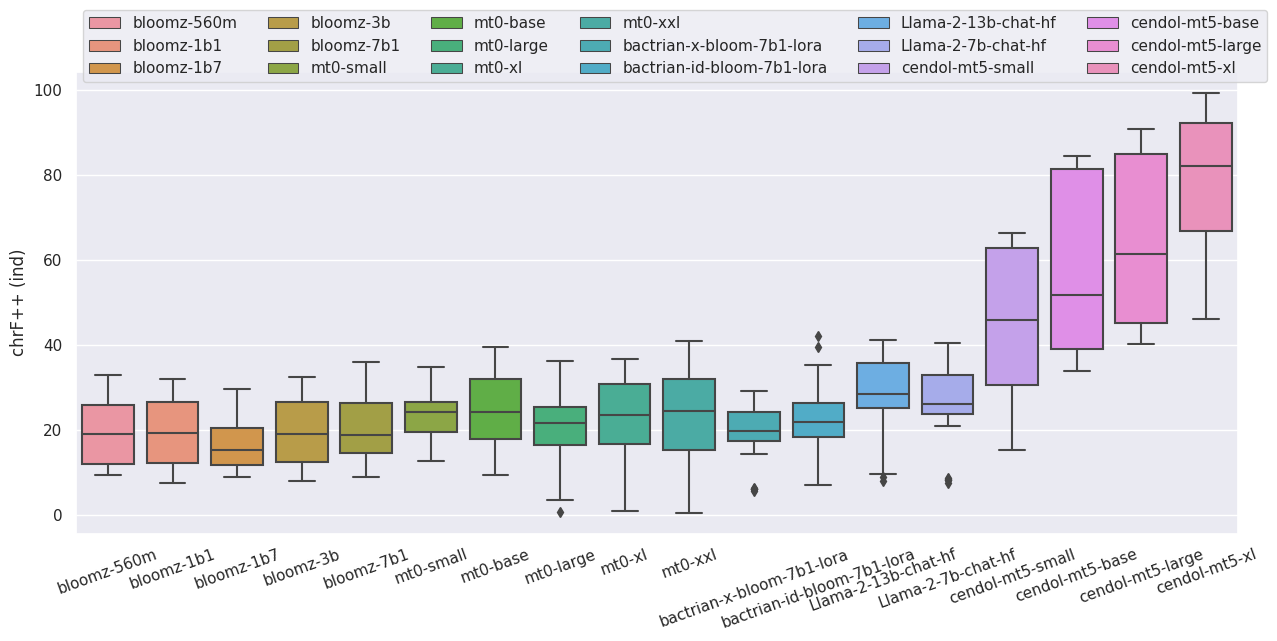

In [167]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'].str.startswith('korpus_nusantara_ind')) & (pdf['lang'] == 'ind')
].sort_values('model_id'), x='model', y='chrF++', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('chrF++ (ind)')
plt.xlabel(None)
plt.savefig('./figures/chrf_mt2oth_eng.pdf', bbox_inches='tight')
plt.show()

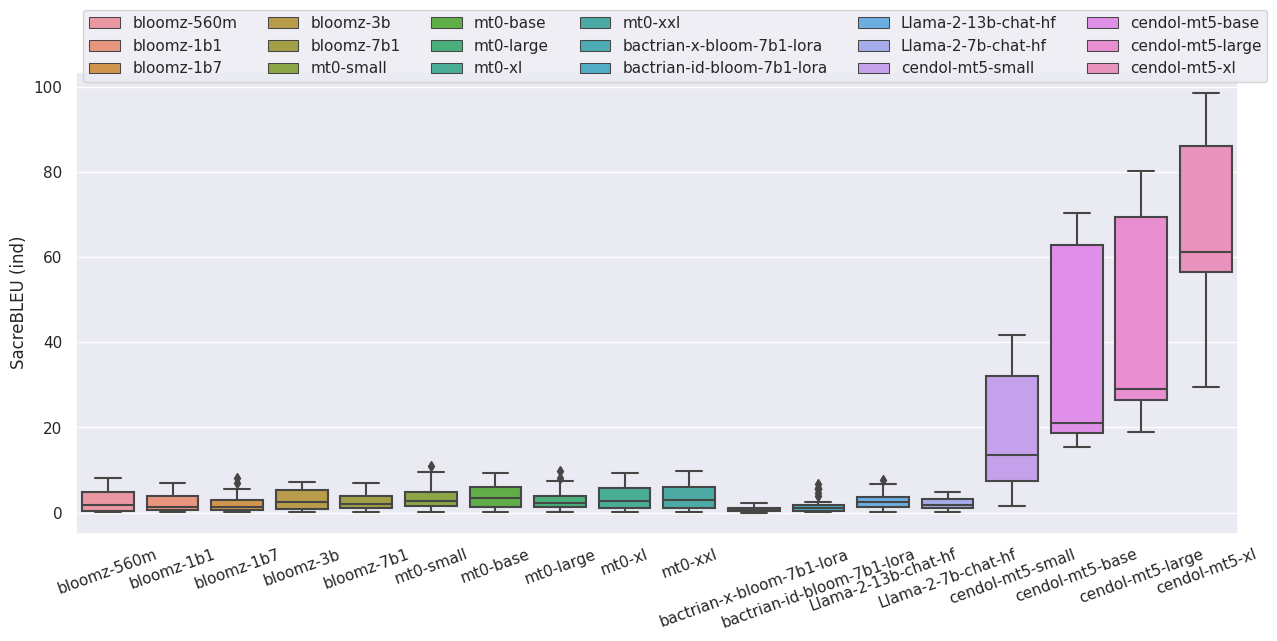

In [168]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'].str.startswith('korpus_nusantara_ind')) & (pdf['lang'] == 'ind')
].sort_values('model_id'), x='model', y='SacreBLEU', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU (ind)')
plt.xlabel(None)
plt.savefig('./figures/bleu_mt2oth_ind.pdf', bbox_inches='tight')
plt.show()

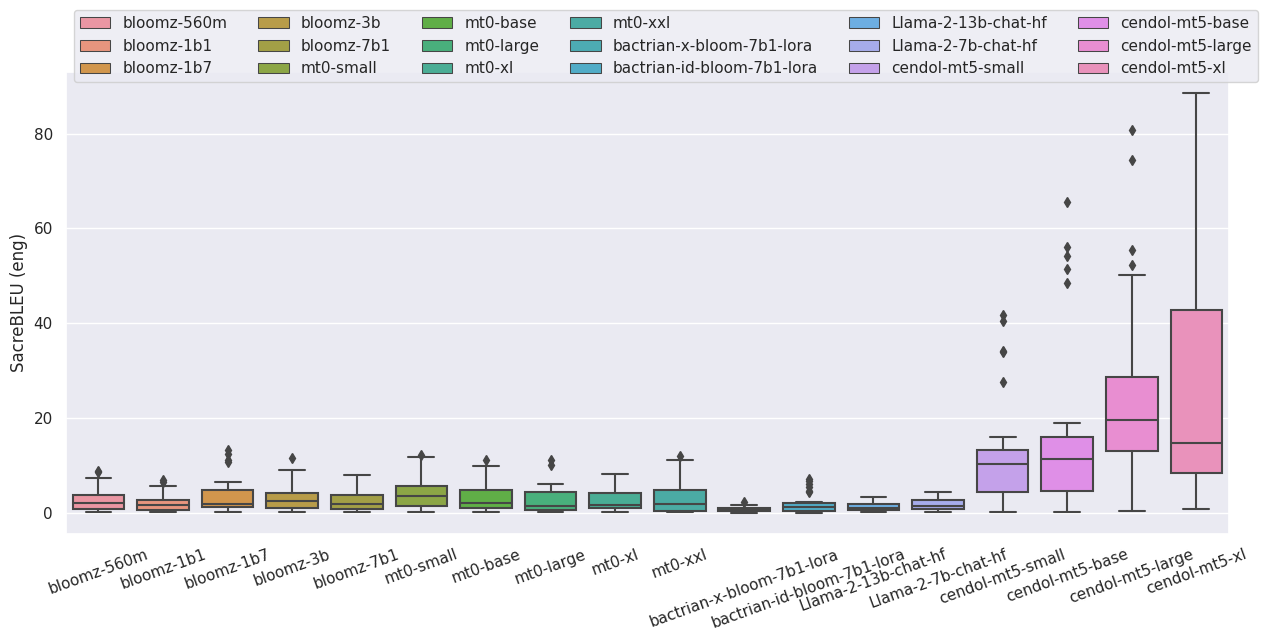

In [169]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (pdf['dataset'].str.startswith('korpus_nusantara_ind')) & (pdf['lang'] == 'eng')
].sort_values('model_id'), x='model', y='SacreBLEU', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU (eng)')
plt.xlabel(None)
plt.savefig('./figures/bleu_mt2oth_eng.pdf', bbox_inches='tight')
plt.show()

## TydiQA

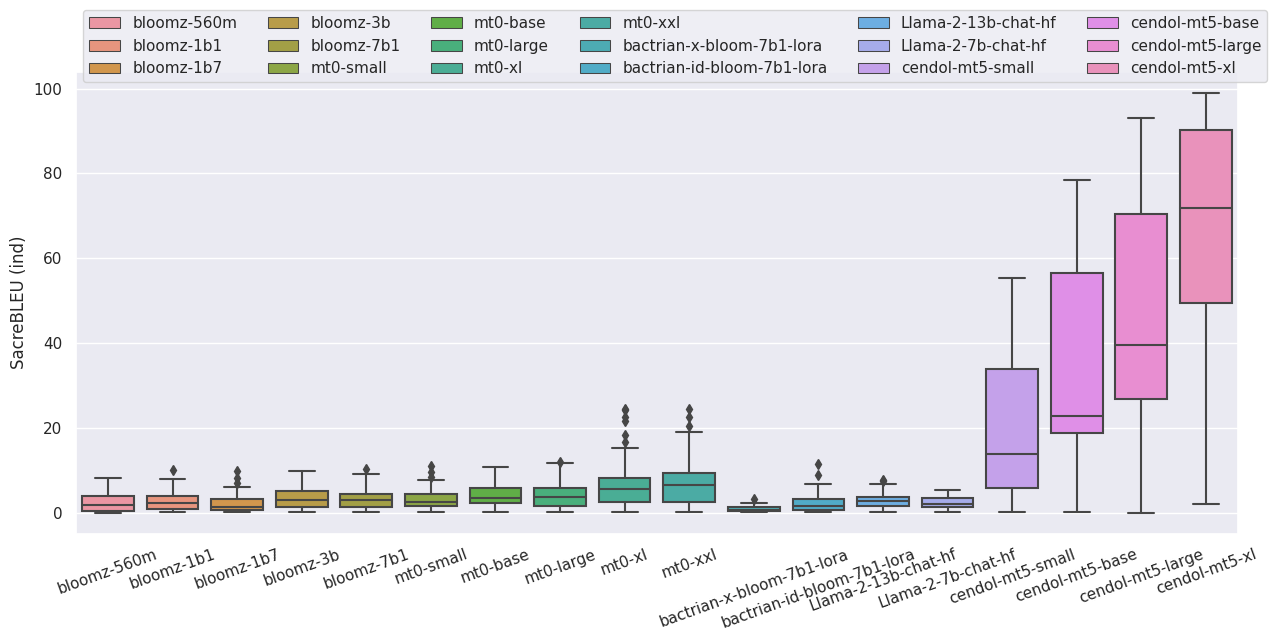

In [177]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (~pdf['dataset'].isin(['tydiqa_id_nusantara_qa'])) & (pdf['lang'] == 'ind')
].sort_values('model_id'), x='model', y='SacreBLEU', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU (ind)')
plt.xlabel(None)
plt.savefig('sacrebleu_qa_ind.pdf', bbox_inches='tight')
plt.show()

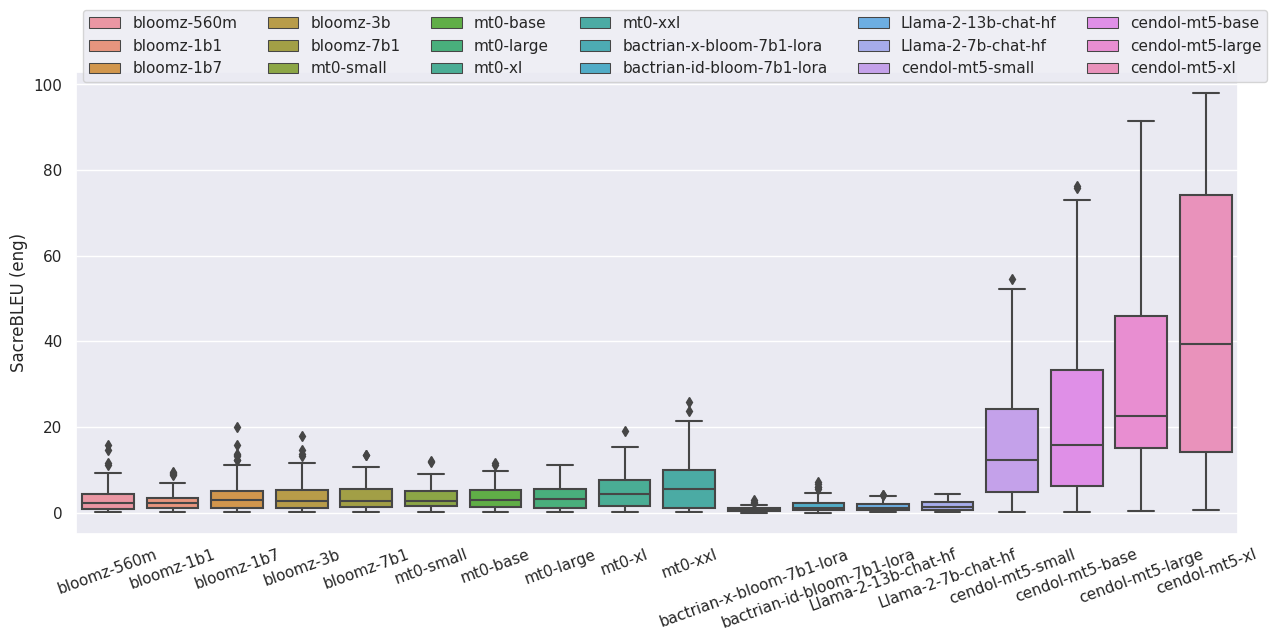

In [178]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[
    (~pdf['dataset'].isin(['tydiqa_id_nusantara_qa'])) & (pdf['lang'] == 'eng')
].sort_values('model_id'), x='model', y='SacreBLEU', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU (eng)')
plt.xlabel(None)
plt.savefig('sacrebleu_qa_eng.pdf', bbox_inches='tight')
plt.show()

# Summarization

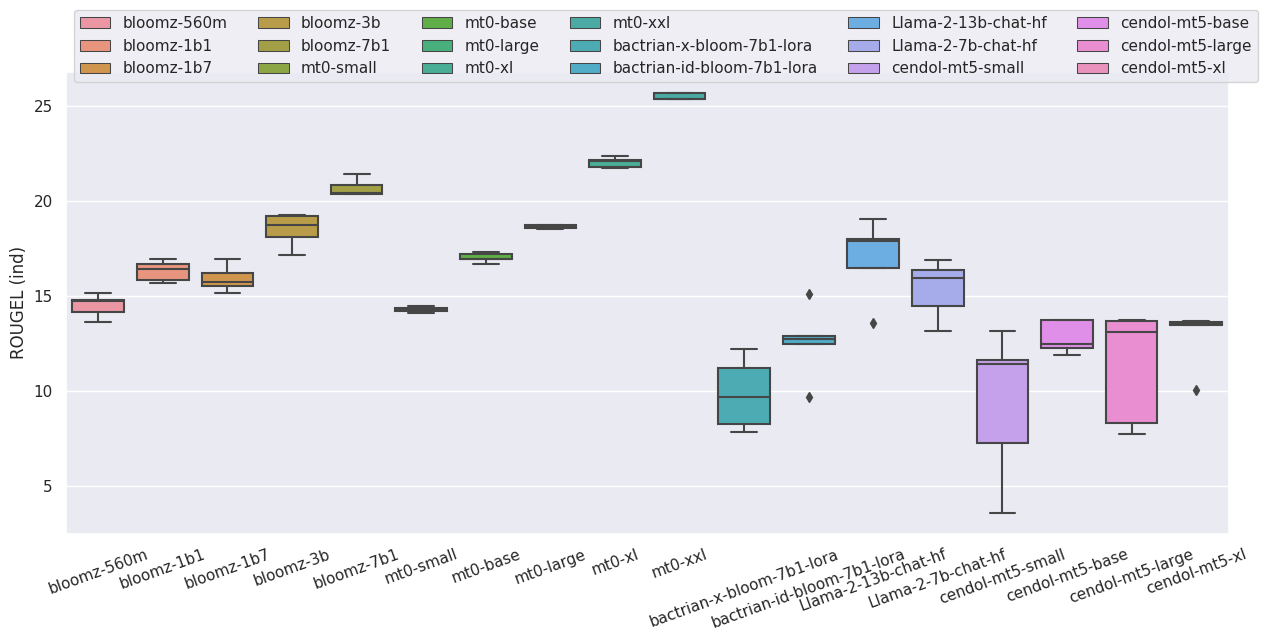

In [172]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[(pdf['dataset'] == 'xl_sum_nusantara_t2t') & (pdf['lang'] == 'ind')].sort_values('model_id'), x='model', y='ROUGEL', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'ind'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('ROUGEL (ind)')
plt.xlabel(None)
plt.savefig('./figures/rougel_xlsum_ind.pdf', bbox_inches='tight')
plt.show()

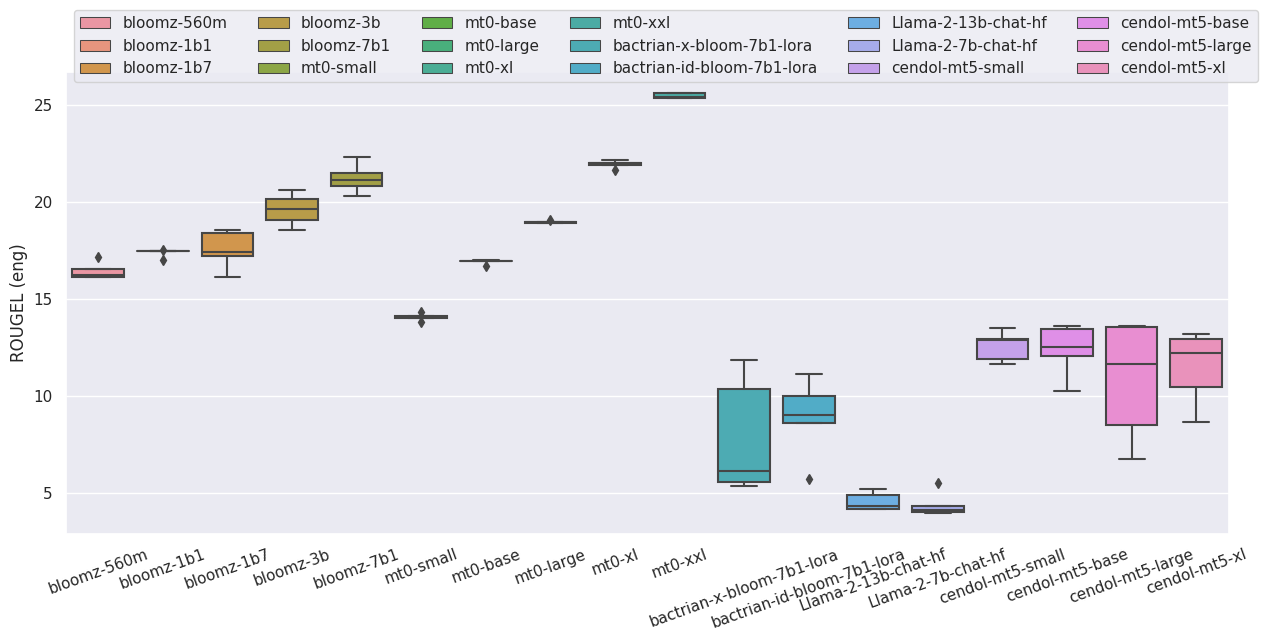

In [173]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf[(pdf['dataset'] == 'xl_sum_nusantara_t2t') & (pdf['lang'] == 'eng')].sort_values('model_id'), x='model', y='ROUGEL', hue='model', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('ROUGEL (eng)')
plt.xlabel(None)
plt.savefig('./figures/rougel_xlsum_eng.pdf', bbox_inches='tight')
plt.show()

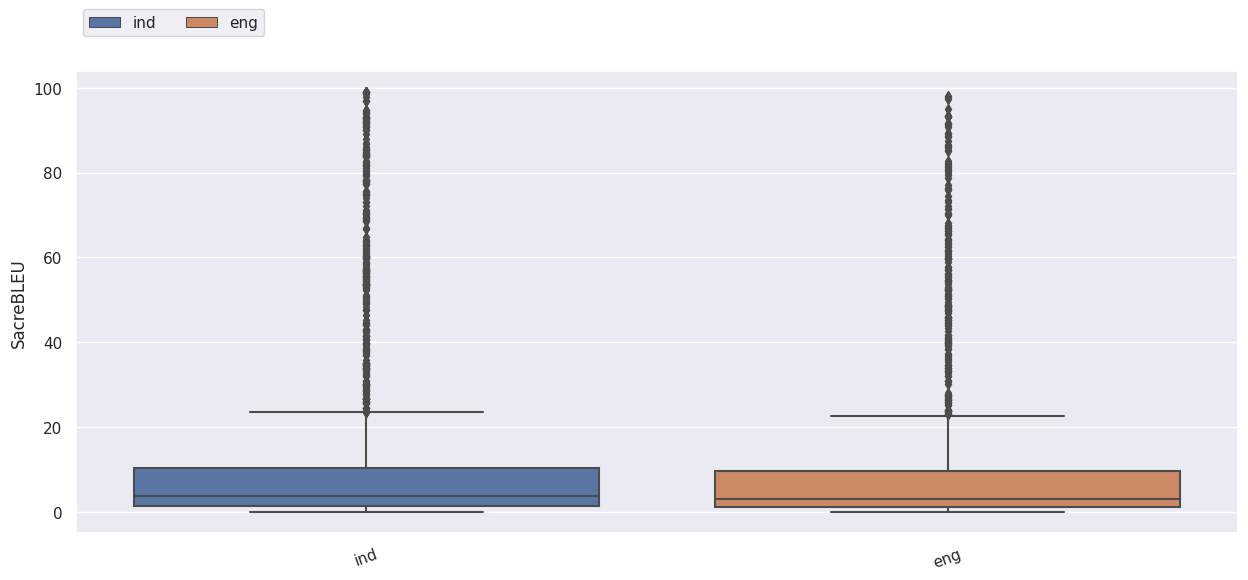

In [174]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf.sort_values('model_id'), x='lang', y='SacreBLEU', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('SacreBLEU')
plt.xlabel(None)
plt.savefig('./figures/sacrebleu_lang.pdf', bbox_inches='tight')
plt.show()

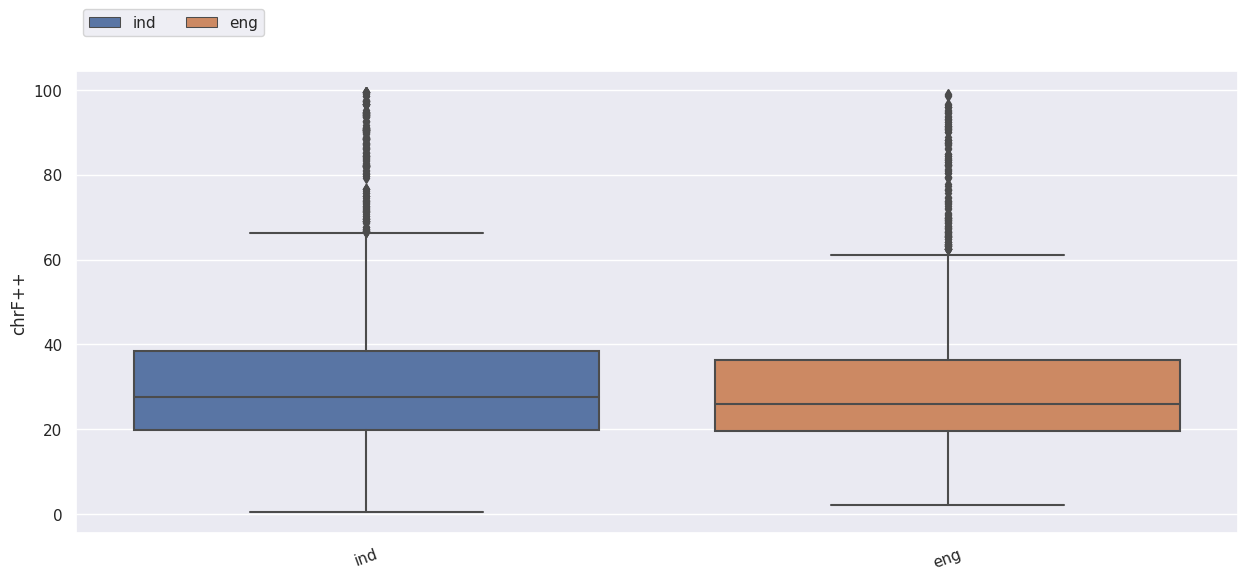

In [175]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf.sort_values('model_id'), x='lang', y='chrF++', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('chrF++')
plt.xlabel(None)
plt.savefig('./figures/chrf_lang.pdf', bbox_inches='tight')
plt.show()

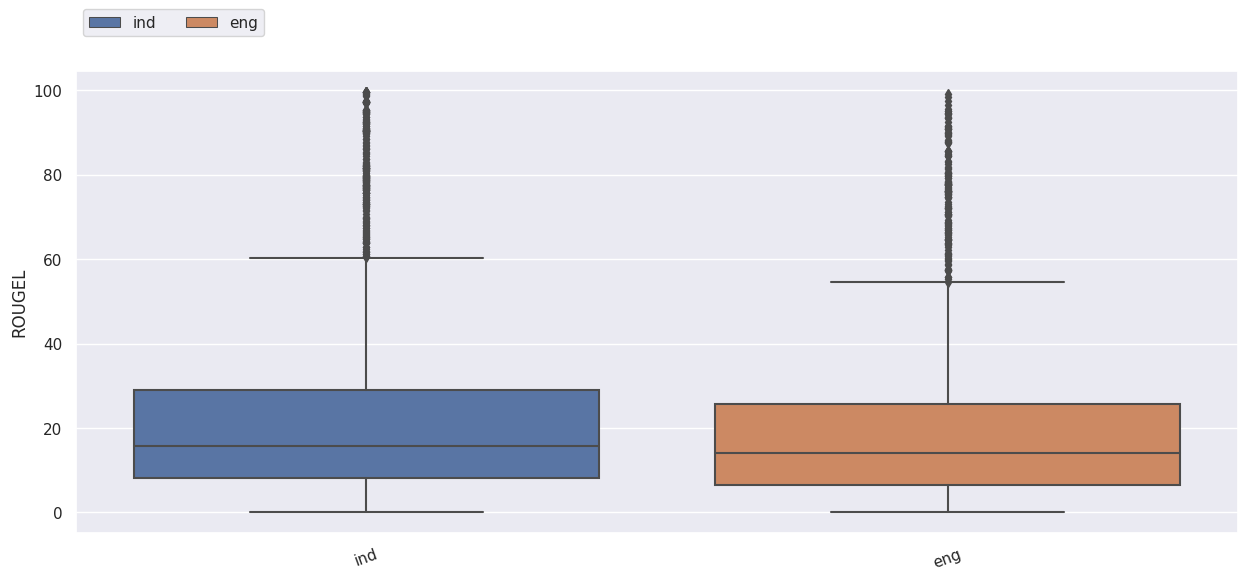

In [176]:
sns.set(rc={'figure.figsize':(15,6)})

pdf = df.copy()
pdf['model_id'] = pdf['model'].apply(lambda x: model_to_index[x])
sns.boxplot(pdf.sort_values('model_id'), x='lang', y='ROUGEL', hue='lang', dodge=False)
# sns.stripplot(pdf[pdf['lang'] == 'eng'].sort_values('model_id'), x='model', y='weighted_f1_score', hue='model', legend=False, alpha=.8)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.15), ncols=6)
plt.xticks(rotation=20)
plt.ylabel('ROUGEL')
plt.xlabel(None)
plt.savefig('./figures/rougel_lang.pdf', bbox_inches='tight')
plt.show()

# TEMP

In [3]:
from colour import Color
from matplotlib.colors import LinearSegmentedColormap

def make_cmap( colors ): 
    cmap = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in colors ] )
    return cmap

custom_cmap = make_cmap( ['#05a37e','#000000' ] ) 

/tmp/ipykernel_2865/1731637878.py:9: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x7f6407b6c820> starts with '_'. It is thus excluded from the legend.
  plt.legend(['_nolegend_', 'ChatGPT', 'GPT-4'], loc='upper right', fontsize=24, fancybox=True, framealpha=0.95)


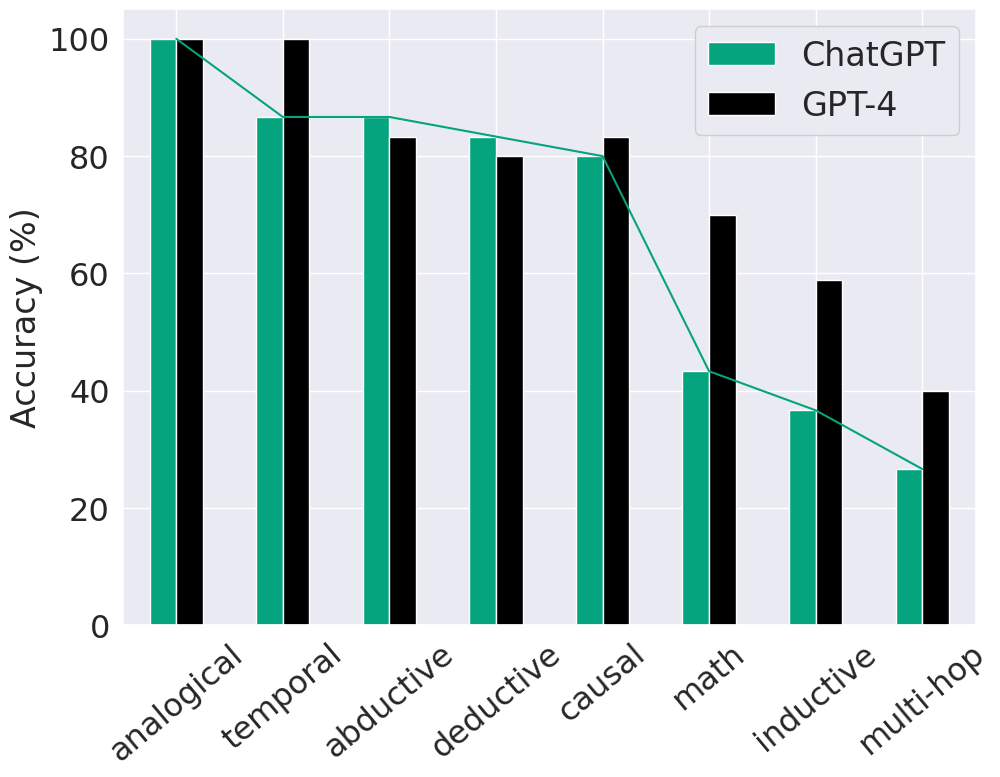

In [20]:
sns.set(rc={'figure.figsize':(11,8)})
df = pd.read_csv('chatgpt.csv').dropna()
df['Reasoning Type'] = df['Reasoning Type'].apply(lambda x: x.replace(' ', '\n'))
ddf = (df.groupby('Reasoning Type')[['ChatGPT', 'GPT-4']].mean() * 100).sort_values(['ChatGPT', 'GPT-4'], ascending=False)

ax = ddf.plot(kind='bar', cmap=custom_cmap)
ddf[['ChatGPT']].plot(ax=ax, cmap=custom_cmap, legend=False)

plt.legend(['_nolegend_', 'ChatGPT', 'GPT-4'], loc='upper right', fontsize=24, fancybox=True, framealpha=0.95)
# plt.legend([ 'ChatGPT', 'GPT-4'], loc='upper left', fontsize=24, fancybox=True, framealpha=0.95)

plt.ylabel('Accuracy (%)', fontsize=24)
plt.xlabel('', fontsize=1)
plt.xticks(fontsize=23, rotation=40)
plt.yticks(fontsize=23)
plt.ylim(0,105)
plt.savefig('reasoning_results.png', bbox_inches='tight')

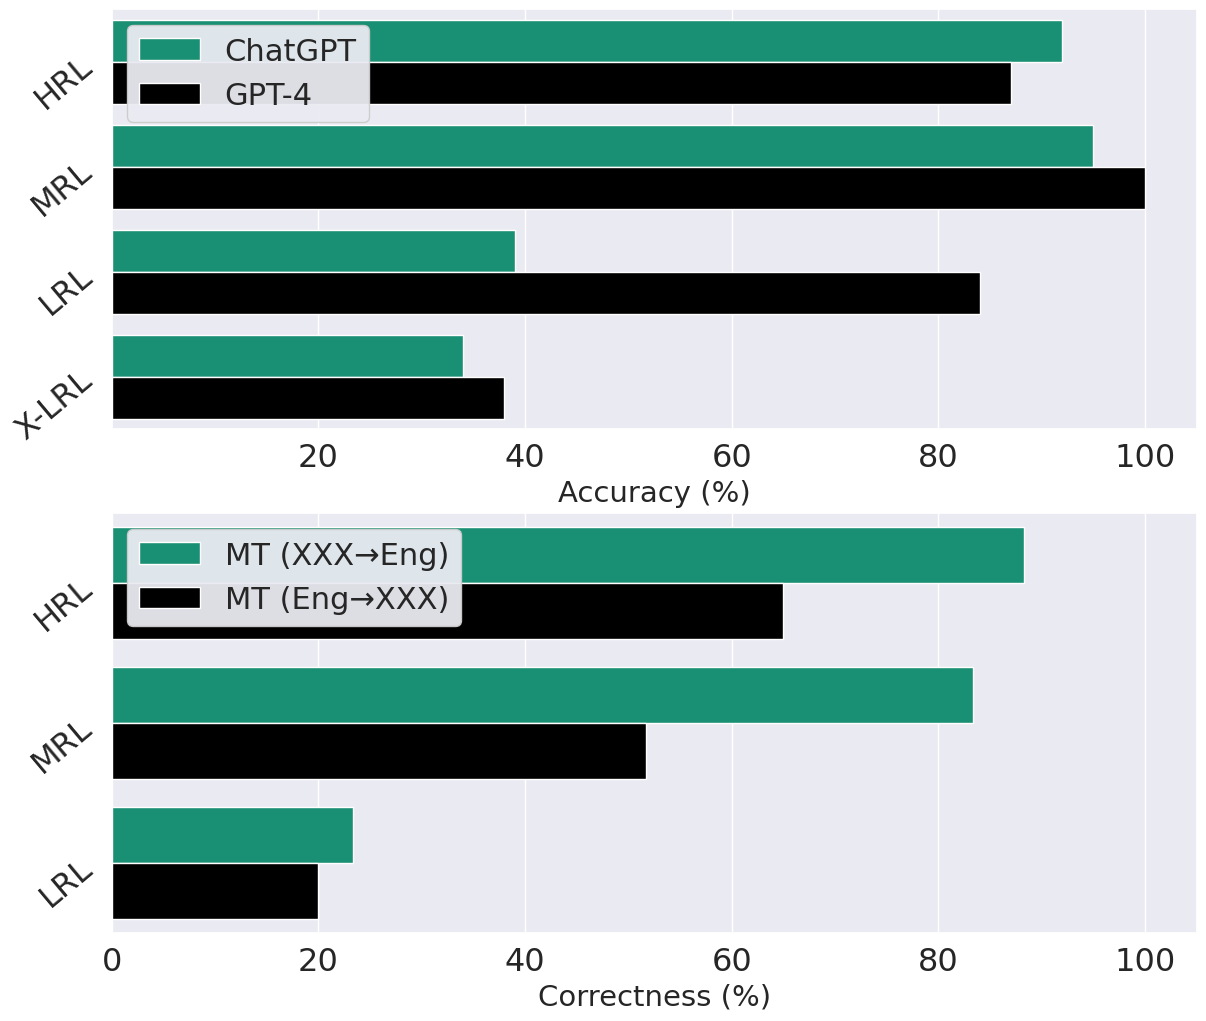

In [77]:
sns.set(rc={'figure.figsize':(14,12)})
df = pd.read_csv('chatgpt-multi.csv').dropna()
df['Accuracy'] = df['Accuracy'] * 100

custom_palette = sns.color_palette(['#05a37e','#000000'])
fig, (ax1, ax2) = plt.subplots(2, 1)

sns.barplot(df[df['Task'].isin(['Sentiment', 'LID'])].sort_values('Model'), y='Resource', x='Accuracy', hue='Model', ax=ax1, palette=custom_palette, errorbar=None)
ax1.set_xlabel('Accuracy (%)', fontsize=21)
ax1.set_ylabel('', fontsize=1)
ax1.set_yticks([0, 1, 2, 3], ['HRL', 'MRL', 'LRL', 'X-LRL'], fontsize=23, rotation=40)
ax1.set_xticks([20, 40, 60, 80, 100], [20, 40, 60, 80, 100], fontsize=23)

h, l = ax1.get_legend_handles_labels()
ax1.legend(handles=h, labels=l, loc='upper left', fontsize=22, framealpha=0.95)

sns.barplot(df[~df['Task'].isin(['Sentiment', 'LID'])].sort_values('Model'), y='Resource', x='Accuracy', hue='Task', ax=ax2, palette=custom_palette)
plt.xlabel('Correctness (%)', fontsize=21)
plt.ylabel('', fontsize=1)
plt.yticks(fontsize=23, rotation=40)
plt.xticks(fontsize=23)

h, l = ax2.get_legend_handles_labels()
ax2.legend(handles=h, labels=l, loc='upper left', fontsize=22, framealpha=0.95)

ax1.set_xlim(0,105)
ax2.set_xlim(0,105)

# plt.ylim(0,105)
plt.savefig('multilingual_results.png', bbox_inches='tight')

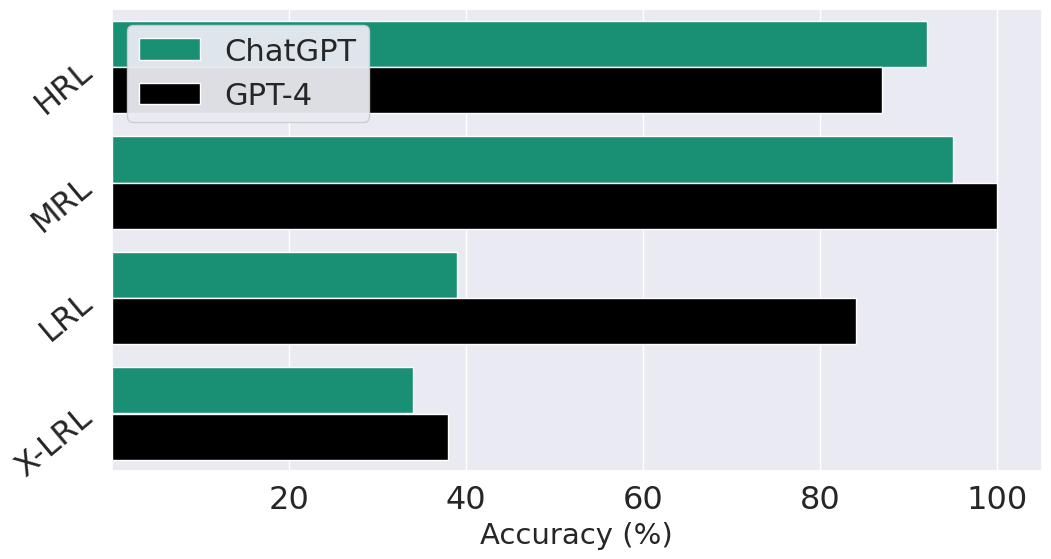

In [85]:
sns.set(rc={'figure.figsize':(12,6)})
df = pd.read_csv('chatgpt-multi.csv').dropna()
df['Accuracy'] = df['Accuracy'] * 100

custom_palette = sns.color_palette(['#05a37e','#000000'])

ax = sns.barplot(df[df['Task'].isin(['Sentiment', 'LID'])].sort_values('Model'), y='Resource', x='Accuracy', hue='Model', palette=custom_palette, errorbar=None)
ax.set_xlabel('Accuracy (%)', fontsize=21)
ax.set_ylabel('', fontsize=1)
ax.set_yticks([0, 1, 2, 3], ['HRL', 'MRL', 'LRL', 'X-LRL'], fontsize=23, rotation=40)
ax.set_xticks([20, 40, 60, 80, 100], [20, 40, 60, 80, 100], fontsize=23)

h, l = ax.get_legend_handles_labels()
ax.legend(handles=h, labels=l, loc='upper left', fontsize=22, framealpha=0.95)

# sns.barplot(df[~df['Task'].isin(['Sentiment', 'LID'])].sort_values('Model'), y='Resource', x='Accuracy', hue='Task', ax=ax2, palette=custom_palette)
# plt.xlabel('Correctness (%)', fontsize=21)
# plt.ylabel('', fontsize=1)
# plt.yticks(fontsize=23, rotation=40)
# plt.xticks(fontsize=23)

# h, l = ax2.get_legend_handles_labels()
# ax2.legend(handles=h, labels=l, loc='upper left', fontsize=22, framealpha=0.95)

# ax1.set_xlim(0,105)
# ax2.set_xlim(0,105)

# plt.ylim(0,105)
plt.savefig('multilingual_results.png', bbox_inches='tight')